<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=10>Data Science and Business Analytics</center></font></h1>
<h1><center>Machine Learning - 1: INN hotel - Coded Project</center></h1>

## Problem Statement

### Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, 
and help in formulating profitable policies for cancellations and refunds.

### Dataset

Booking_ID: the unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer:

Not Selected – No meal plan selected

Meal Plan 1 – Breakfast

Meal Plan 2 – Half board (breakfast and one other meal)

Meal Plan 3 – Full board (breakfast, lunch, and dinner)

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

## Loading Libraries

In [3721]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
# %load_ext nb_black

import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
)






## Loading data

In [3723]:
df_main = pd.read_csv("INNHotelsGroup.csv")

In [3724]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset.

In [3727]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [3728]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


### Understand the shape of the dataset.

In [3730]:
data.shape

(36275, 19)

* The dataset has 36275 rows and 19 columns.

### Check the data types of the columns for the dataset.

In [3733]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* booking status is the dependent variable

* no_of_adults,no_of_childerns,no_of_weekend_nights,no_of_week_nights,re,quired_car_parking_space,lead_time,arrival_year,arrival_month,
arrival_date ,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests are of ineteger type while other variables are of float  categorical type respectively

## Checking for duplicates

In [3736]:
data.duplicated().sum()

0

## checking for missing values

In [3738]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [3739]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


* no_of_adults  : There are almost 2 adults in every booking ,maximum no of adults are 4
* no_of_children : Maximum 10 kids reservation observed in booking history
* no_of_weekend_nights : 50% people spend 1 week end night ,75% people spend 2 week end nights in the hotel.Maximum week end night spend by customer is 7 days
* no_of_week_nights : 25% people spend 1 week day night ,50% people spend 2 week day night and 75% people spend 3 weekday nights in the hotel.Maximum 17 days week day night spend by the customers
* required_car_parking_space : Maximum single car parking space is expected by the customers
* lead_time : 75% people booked hotel rooms before 126 days of arrival,50% of people booked 57 days before arrival ,25% people booked 17 days before .some customers booked 443 days before to the arriaval and it is the maximim threshold for this column
* arrival_year : Maximum customers arrived in the year 2018 .Minimum customers booking obsrved in the year 2017
* arrival_month : 75% booking observed in the month of october,50% bookings observed in the month of August,minimum customer bookings observed in the month of jan and maximum bookings observed in the month of december
* arrival_date : 75% customers arrived on 23rd of  month ,50% customers arrived on 16th ,25% arrived on 8th.Minimum customers arrived on 1st and maximum customer arrival is observed on 31st of  month
* repeated_guest : Maximum 1 customer is observed as repeated guest
* no_of_previous_cancellations :Maximum 13 previous cancellations observed with the customers prior to the current booking
* no_of_previous_not_canceled : Maximum 58 customers who did not cancelled thier booking prior to the current booking
* avg_price_per_room : 75% rooms costs 120 Euros ,50% rooms costs 99 Euros ,25% rooms costs 80 Euros.Maximum cost of room is 540 Euro
* no_of_special_requests : 75% customers are having only 1 special requests .maximum 5 special requests are made by the customers

In [3741]:
data.describe(include=["object"]).T

,count,unique,top,freq
Booking_ID,36275,36275,INN00001,1
type_of_meal_plan,36275,4,Meal Plan 1,27835
room_type_reserved,36275,7,Room_Type 1,28130
market_segment_type,36275,5,Online,23214
booking_status,36275,2,Not_Canceled,24390


* Maximumcustomers preferred Meal plan 1 i.e. only break fast
* Room_Type 1 is preferred by maximum customers
* Maximum customers booked hotel rooms through online
  

## Feature Engineering

In [3744]:
# dropping Booking Id
data.drop(["Booking_ID"], axis=1, inplace=True)

In [3745]:
data["arrival_year"].value_counts()

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64

In [3746]:
data["arrival_month"].value_counts()

arrival_month
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: count, dtype: int64

In [3747]:
data["arrival_date"].value_counts()

arrival_date
13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: count, dtype: int64

In [3748]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


## Exploratory Data Analysis

## Functions for EDA

In [3751]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [3752]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [3753]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [3754]:
## Function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## Univariate Analysis

## Distribution of no_of_adults

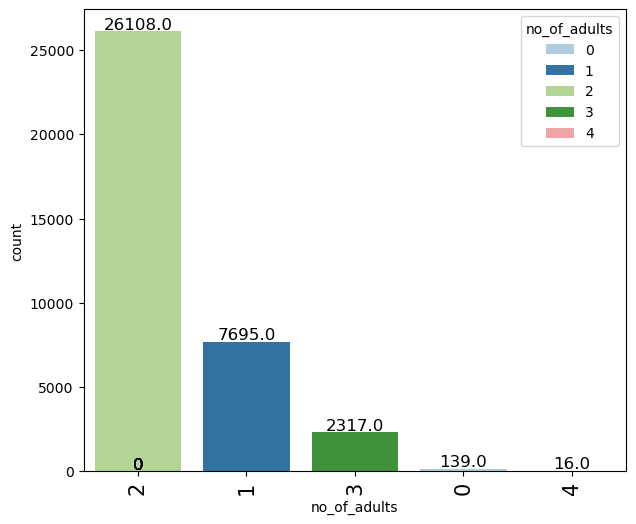

In [3757]:
labeled_barplot(data, "no_of_adults")

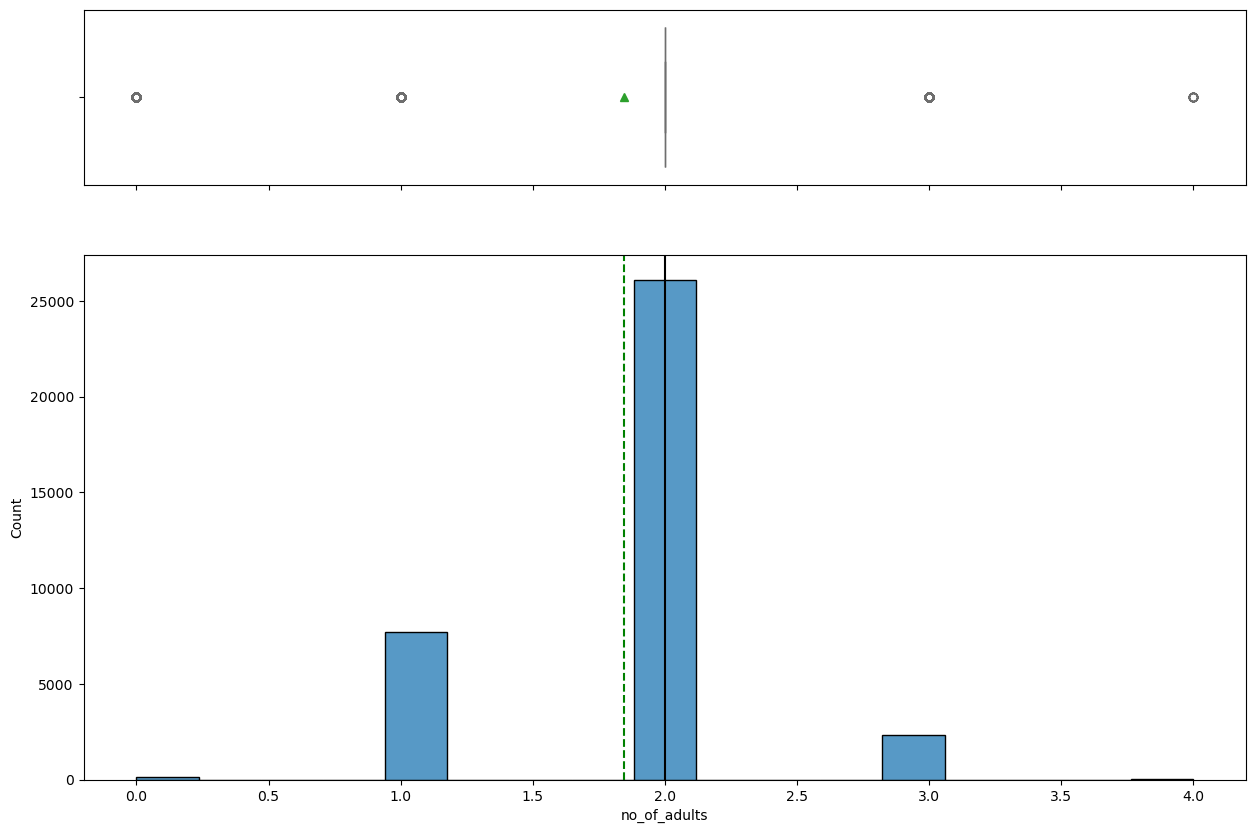

In [3758]:
histogram_boxplot(data, "no_of_adults")

* Maximum bookings i.e. 26108 bookings are with 2 adults
* There are 7695 bookings are with 1 adult
* There are 2317 bookings are with 3 adults
* There are 139 booking are with 0 adults
* There are 16 bookings with 16 adults
* There are outliers present in the data 
  



## Distribution of no of children

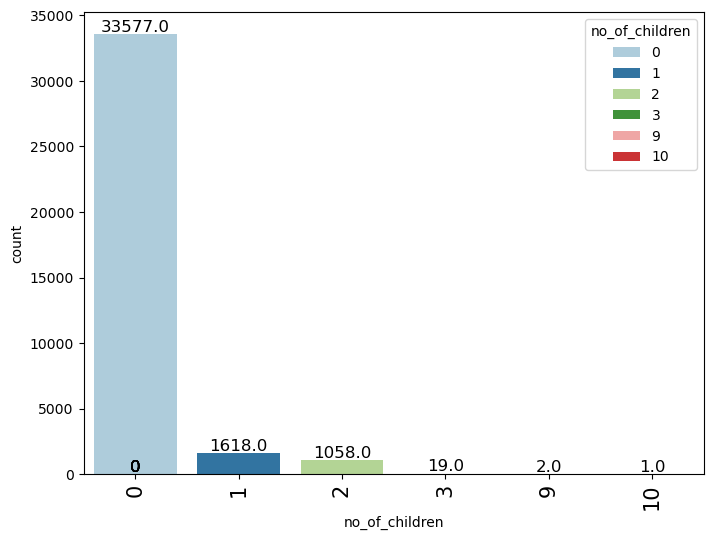

In [3761]:
labeled_barplot(data, "no_of_children")

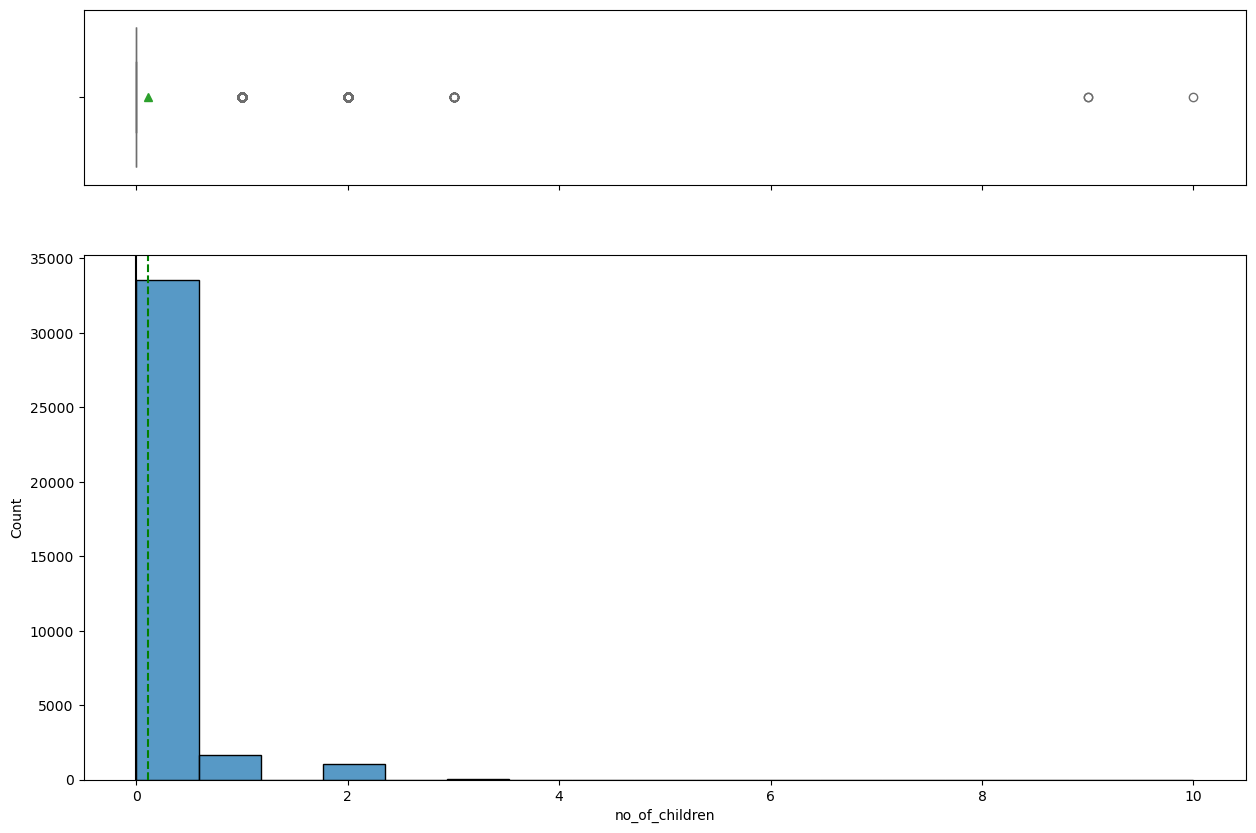

In [3762]:
histogram_boxplot(data, "no_of_children")

* There are 33577 bookings with 0 child
* 1618 bookings are with 1 child
* 1058 bookings are with 2 children
* 19 booking are there with 3 children
* There are 2 bookings with 9 children
* There is only 1 booking with 10 children
* Outliers observed in the data

## Distribution of no of weekend nights

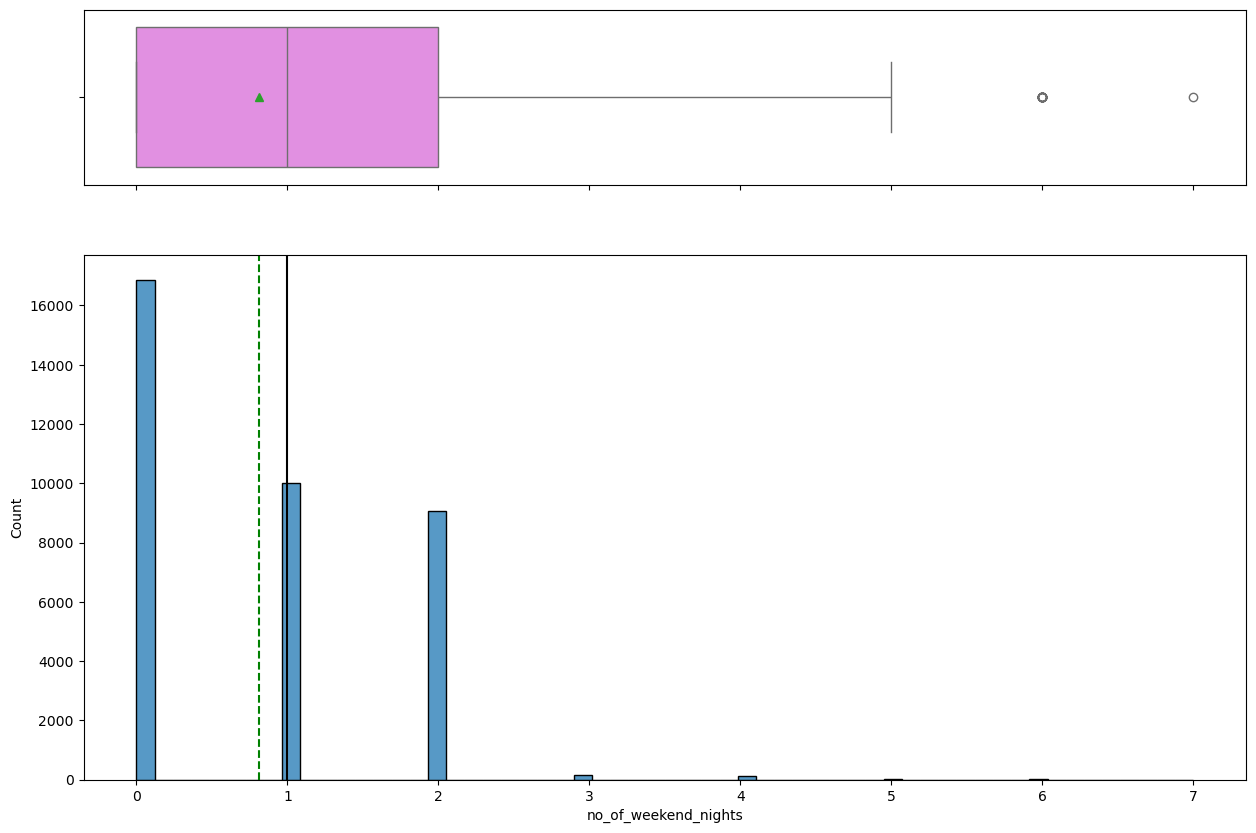

In [3765]:
histogram_boxplot(data, "no_of_weekend_nights")

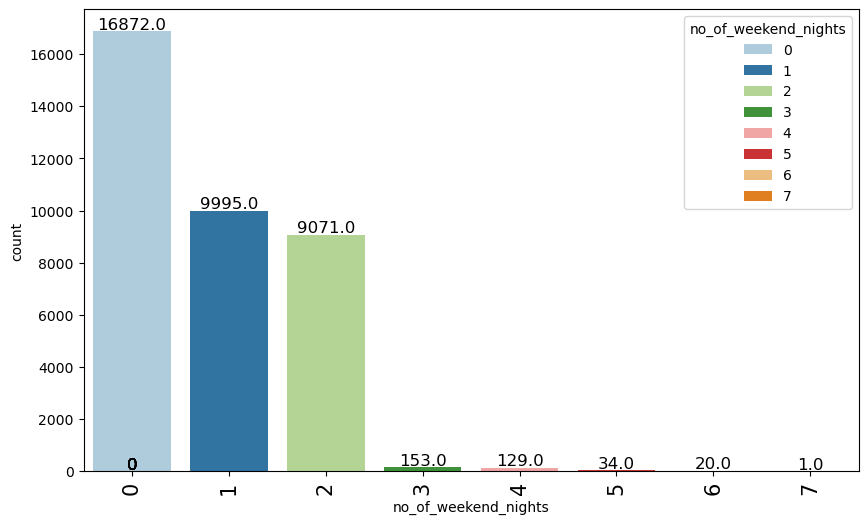

In [3766]:
labeled_barplot(data, "no_of_weekend_nights")

* There are 16872 bookings of customers who spent 0 week end nights in the hotel
* There are 9995 bookings of customers who spent 1 week end nights in the hotel
* There are 9071 bookings of customers who spent 2 week end nights in the hotel
* There are 153 bookings of customers who spent 3 week end nights in the hotel
* There are 129 bookings of customers who spent 4 week end nights in the hotel
* There are 34 bookings of customers who spent 5 week end nights in the hotel
* There are 20 bookings of customers who spent 6 week end nights in the hotel
* There are 1 booking of customer who spent 7 week end nights in the hotel
* There are outliers present in the data

# Distribution of no of week nights

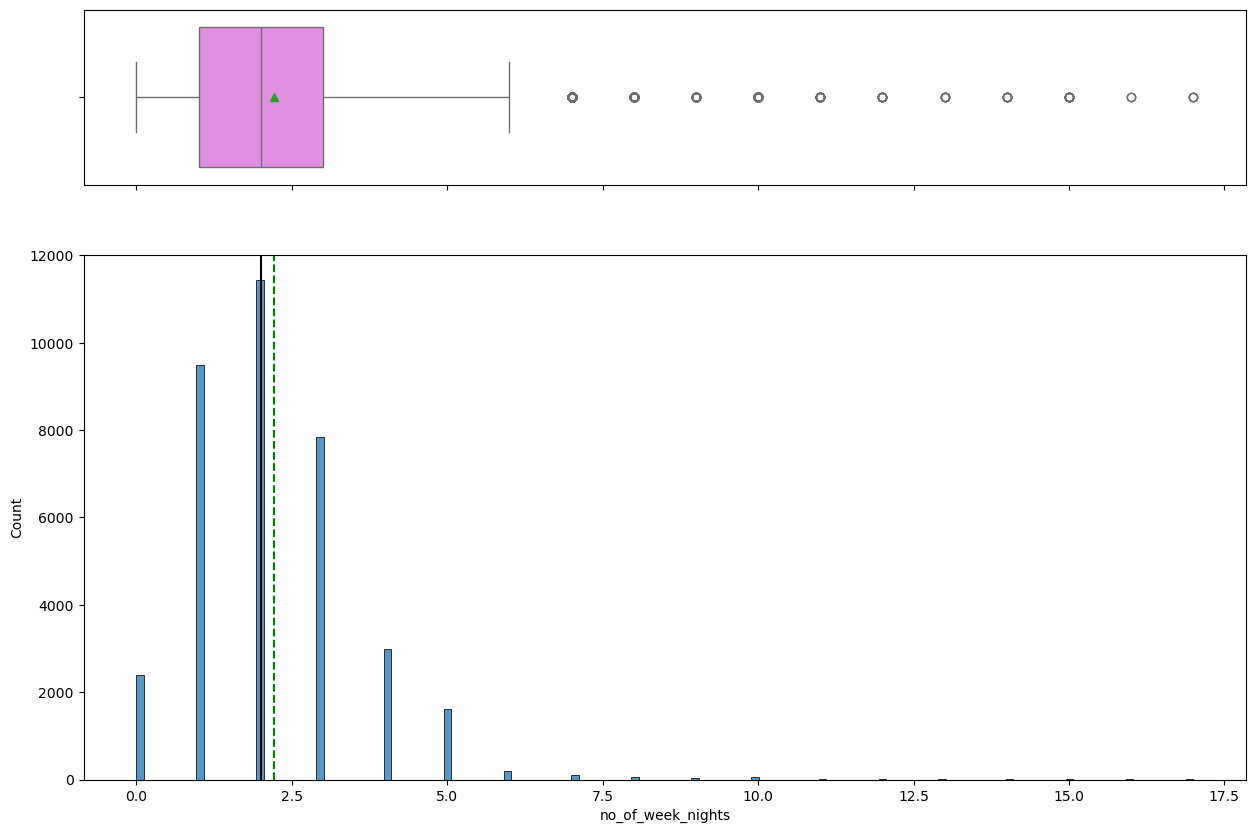

In [3769]:
histogram_boxplot(data, "no_of_week_nights")

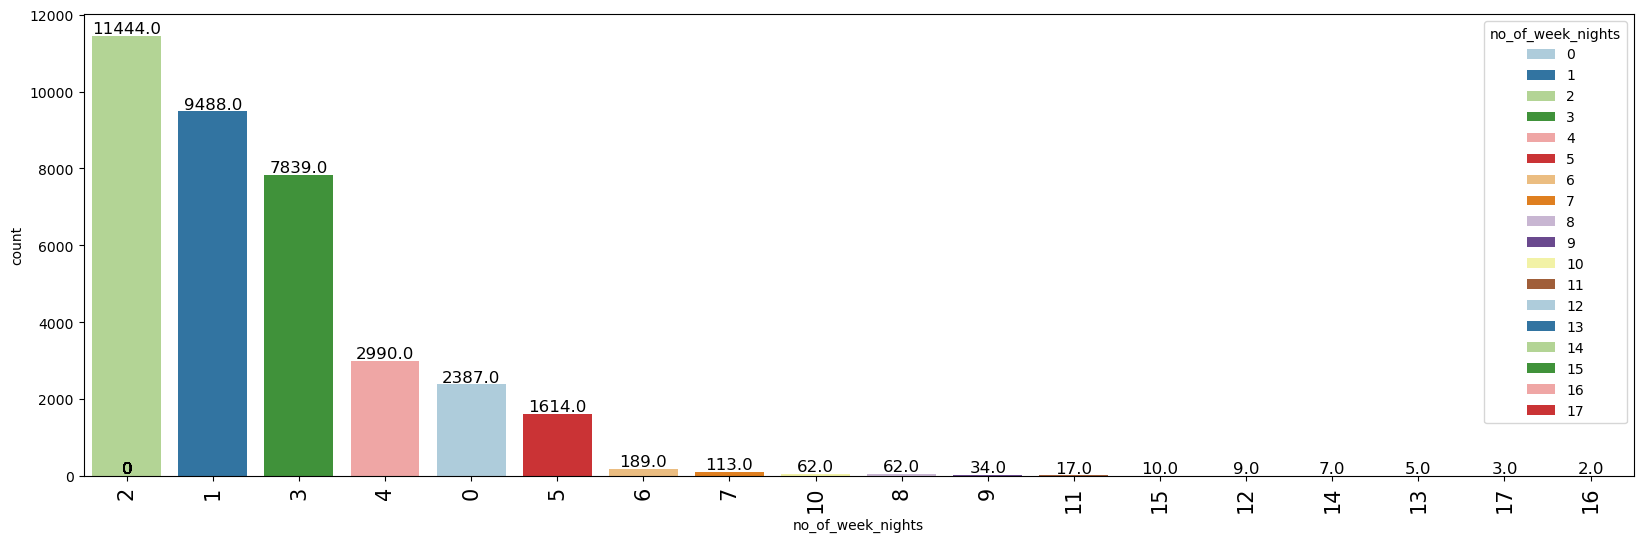

In [3770]:
labeled_barplot(data, "no_of_week_nights")

* There are 11444 bookings with 2 week days
* 9488 bookings with 1 week day
* 7839 bookings with 3 week days
* 2990 bookings with 4 week days
* 2387 bookings with 0 week day i.e 2387 customers preferred booking on other than week days
* 1614 bookings with 5 week days
* Maximum 16 and 17 week days booking is present for 2,3 customers
* Outliers present in the data
* 

# Distribution of required car parking space

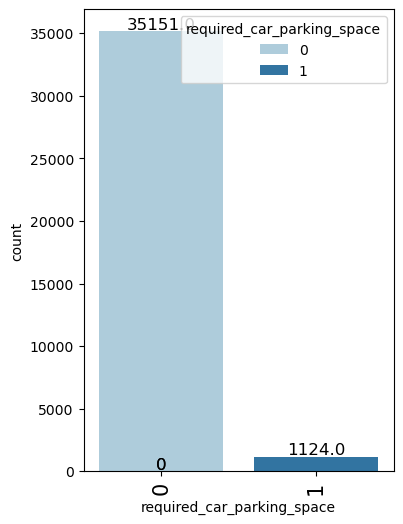

In [3773]:
labeled_barplot(data, "required_car_parking_space")

* There 35151 bookings where custimers did not expect car parking
* There 1124 bookings where custimers did not expect car parking

# Distribution of lead time

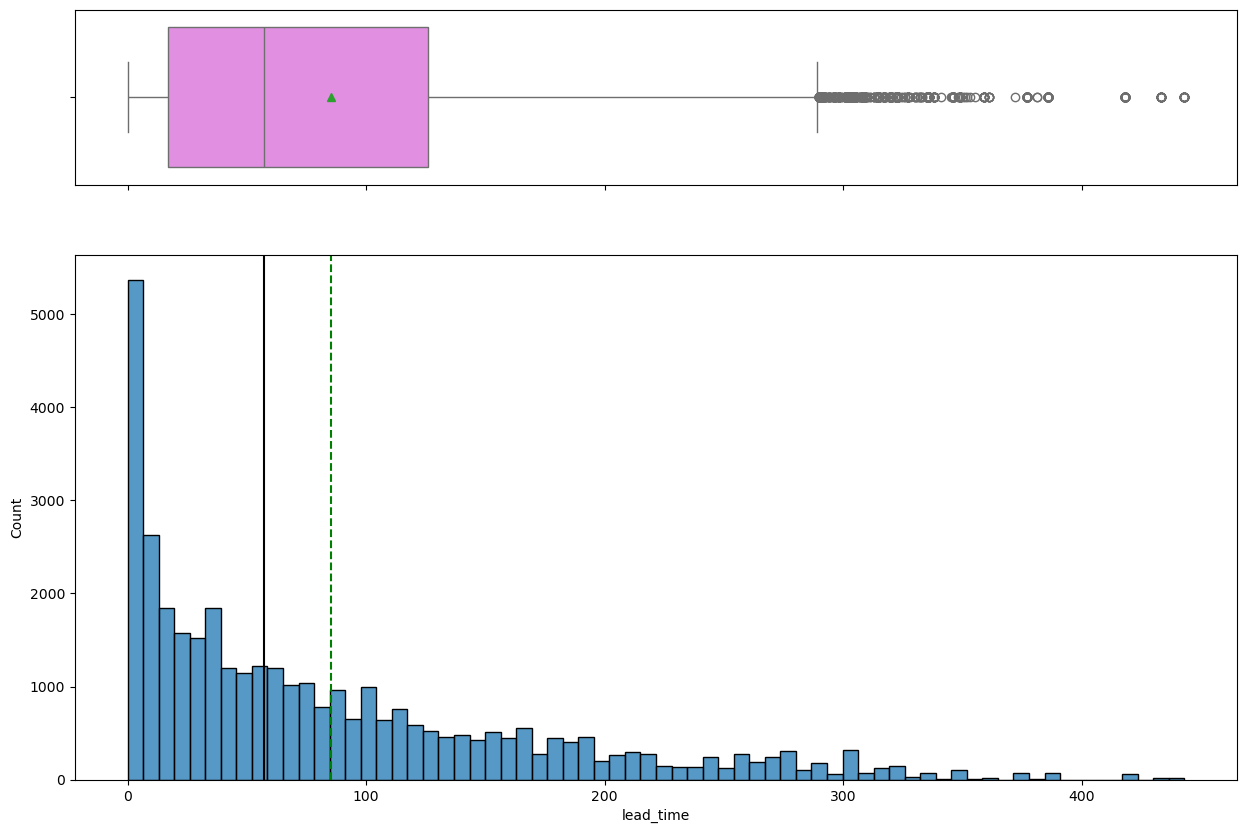

In [3776]:
histogram_boxplot(data, "lead_time")

* There are lot of oultliers present in the data
* Most of the people booked hotel rooms  100 days prior to the arrival
  

# Distribution of arrival year

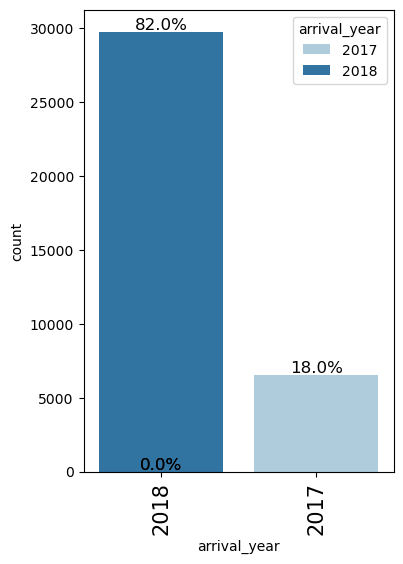

In [3779]:
labeled_barplot(data, "arrival_year", perc=True)

* Maximum customers arrived on 2018 i.e around 82%
* 18% customers arrived in the year 2017

# Distribution of arrival month

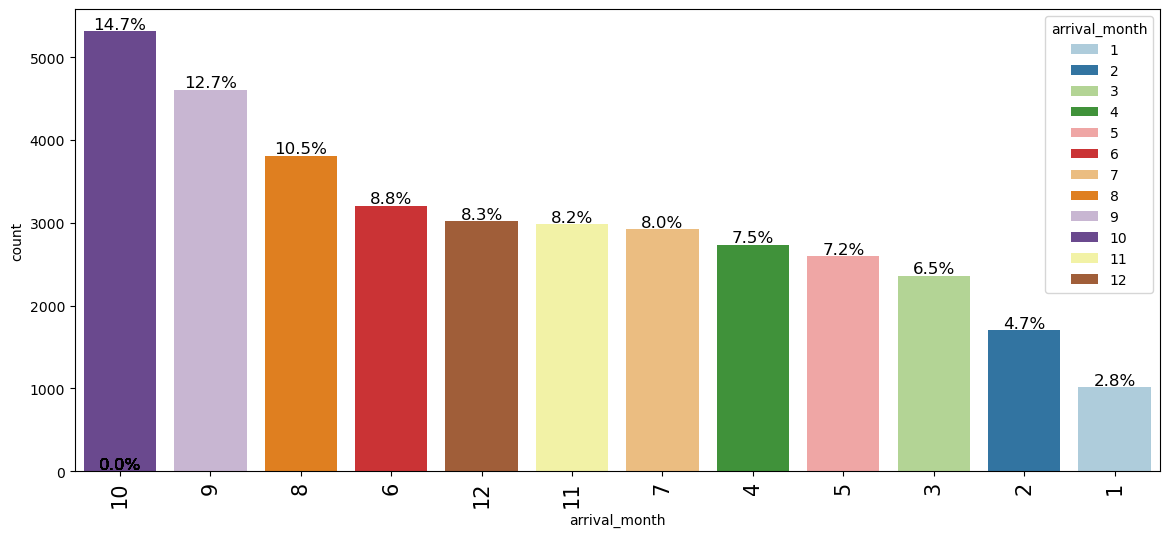

In [3782]:
labeled_barplot(data, "arrival_month",perc=True)

* Arrival of customers is increasing from March to October
* Minimum arrival of customers is observed in the moth of jan and feb

In [3784]:
data['arrival_month'].value_counts(normalize=True)

arrival_month
10   0.14657
9    0.12711
8    0.10511
6    0.08830
12   0.08328
11   0.08215
7    0.08050
4    0.07542
5    0.07162
3    0.06500
2    0.04697
1    0.02795
Name: proportion, dtype: float64

* October is the busiest month
* Arrival of customers is increasing from March to October
* Minimum arrival of customers is observed in the moth of jan and feb

# Distribution of arrival date

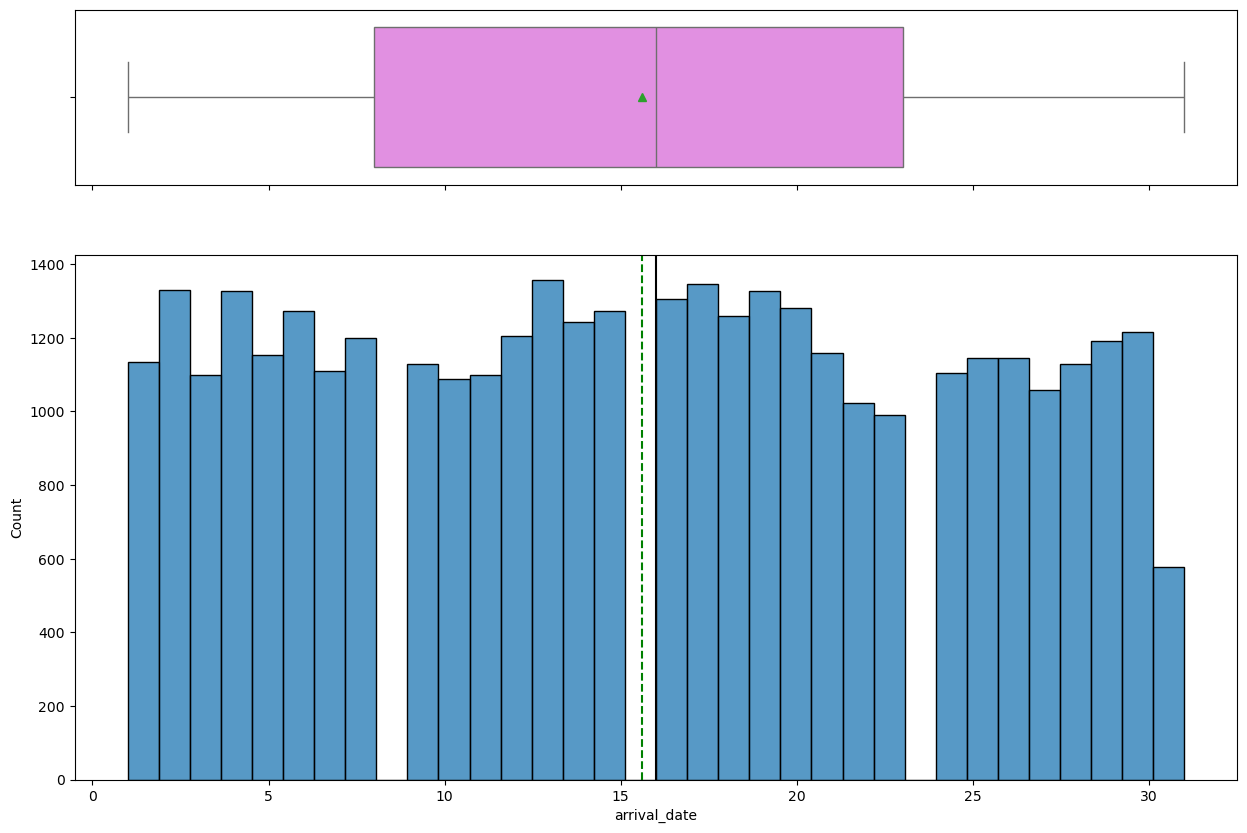

In [3787]:
histogram_boxplot(data, "arrival_date")

* data is mostly uniformly distributed
* Most arrivals observed from 10 to 25th day

# Distribution of repeated guests

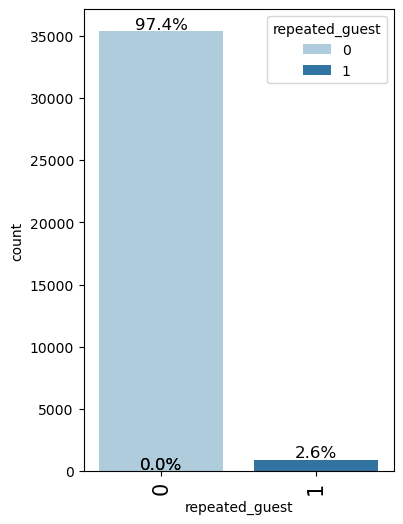

In [3790]:
labeled_barplot(data, "repeated_guest",perc=True)	

* 97% guests are not repeated
* only 3% guests are repeated 

# No of previous booking cancelled

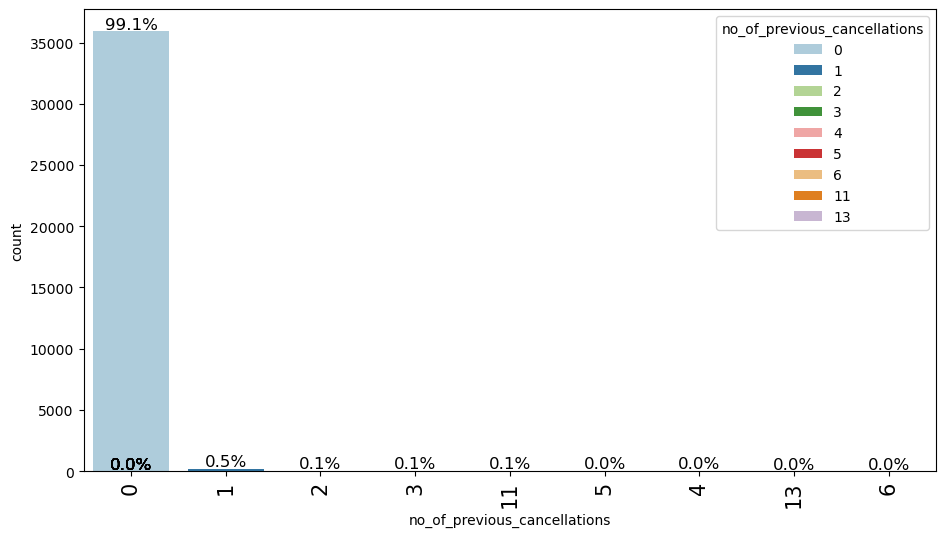

In [3793]:
labeled_barplot(data, "no_of_previous_cancellations",perc=True)	

* 99% customers does not have history of cancelling booking prior to the current bookings

# No of previous booking not cancelled

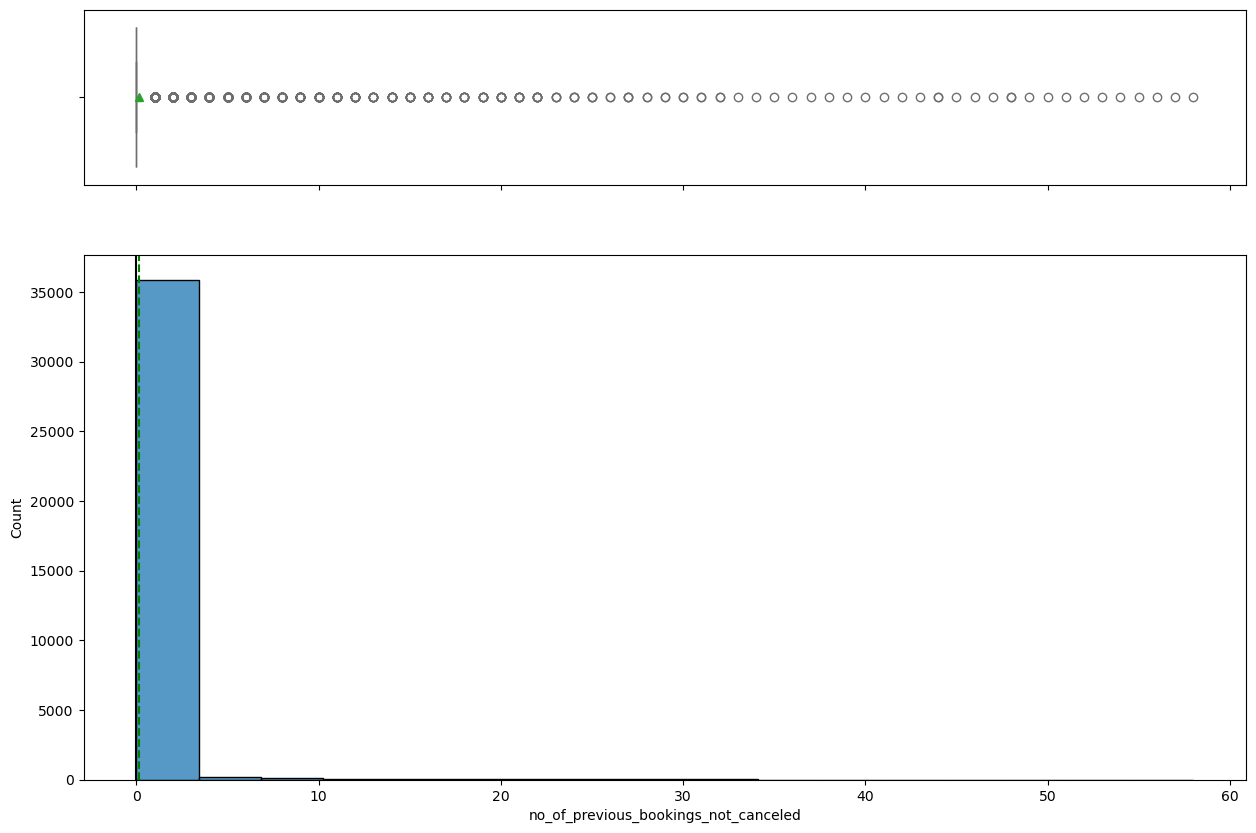

In [3796]:
histogram_boxplot(data, "no_of_previous_bookings_not_canceled")	

* Maximum customers did not cancel thiere previous bookings
* Lot of outliers observed in the data

# Distribution of average price per room

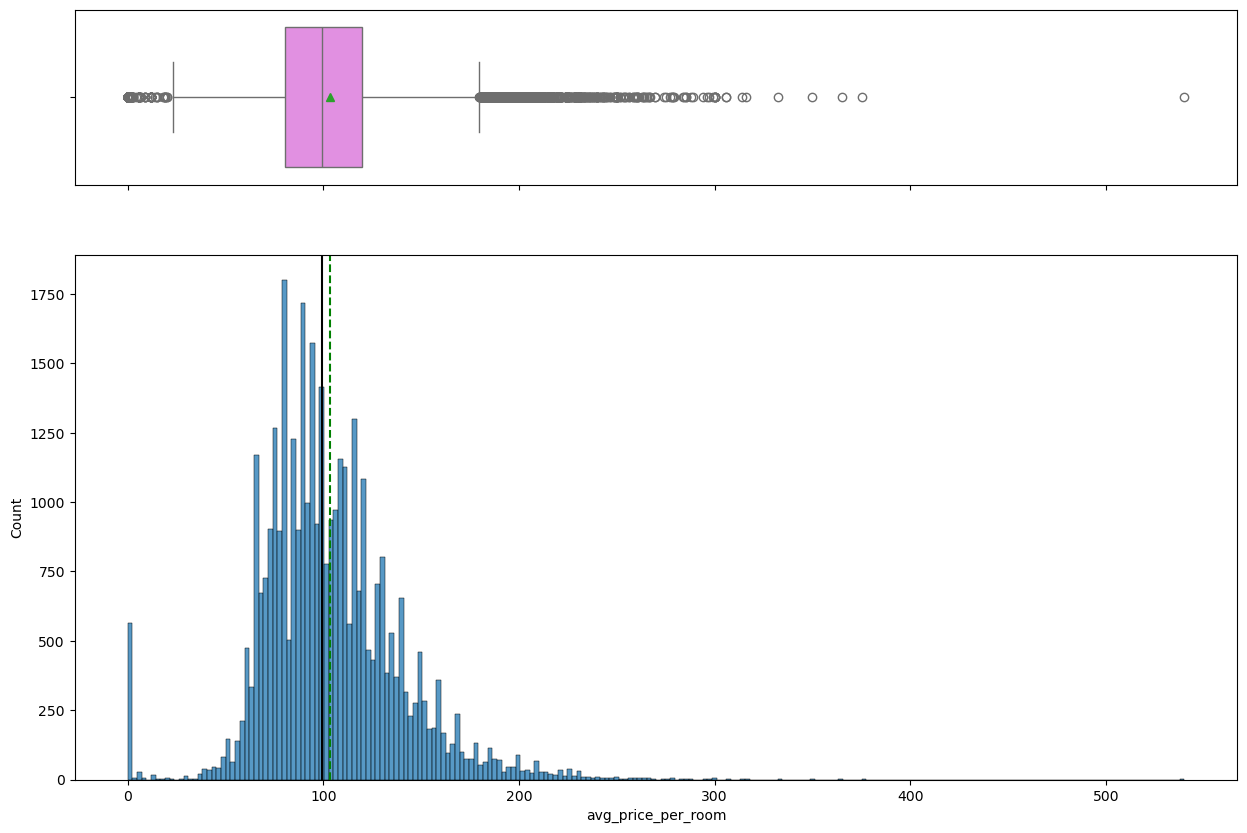

In [3799]:
histogram_boxplot(data, "avg_price_per_room")	 


* There are lot of outliers present in the data
* Average price of the room can not be 0 ,need to check this

In [3801]:
data[data["avg_price_per_room"] == 0]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
63,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00000,1,Not_Canceled
145,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00000,1,Not_Canceled
209,1,0,0,0,Meal Plan 1,0,Room_Type 1,4,2018,2,27,Complementary,0,0,0,0.00000,1,Not_Canceled
266,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.00000,1,Not_Canceled
267,1,0,2,1,Meal Plan 1,0,Room_Type 1,4,2017,8,23,Complementary,0,0,0,0.00000,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.00000,1,Not_Canceled
36080,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.00000,1,Not_Canceled
36114,1,0,0,1,Meal Plan 1,0,Room_Type 1,1,2018,3,2,Online,0,0,0,0.00000,0,Not_Canceled
36217,2,0,2,1,Meal Plan 1,0,Room_Type 2,3,2017,8,9,Online,0,0,0,0.00000,2,Not_Canceled


In [3802]:
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

* We can observe room value is 0 for some cases
*  The rooms given as complimetory can be 0 ,as it is given by hotel
* Online room price can be 0 in case of any promotions

In [3804]:
# adressing the outliers
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data["avg_price_per_room"].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

179.55

In [3805]:
# assigning the outliers the value of upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

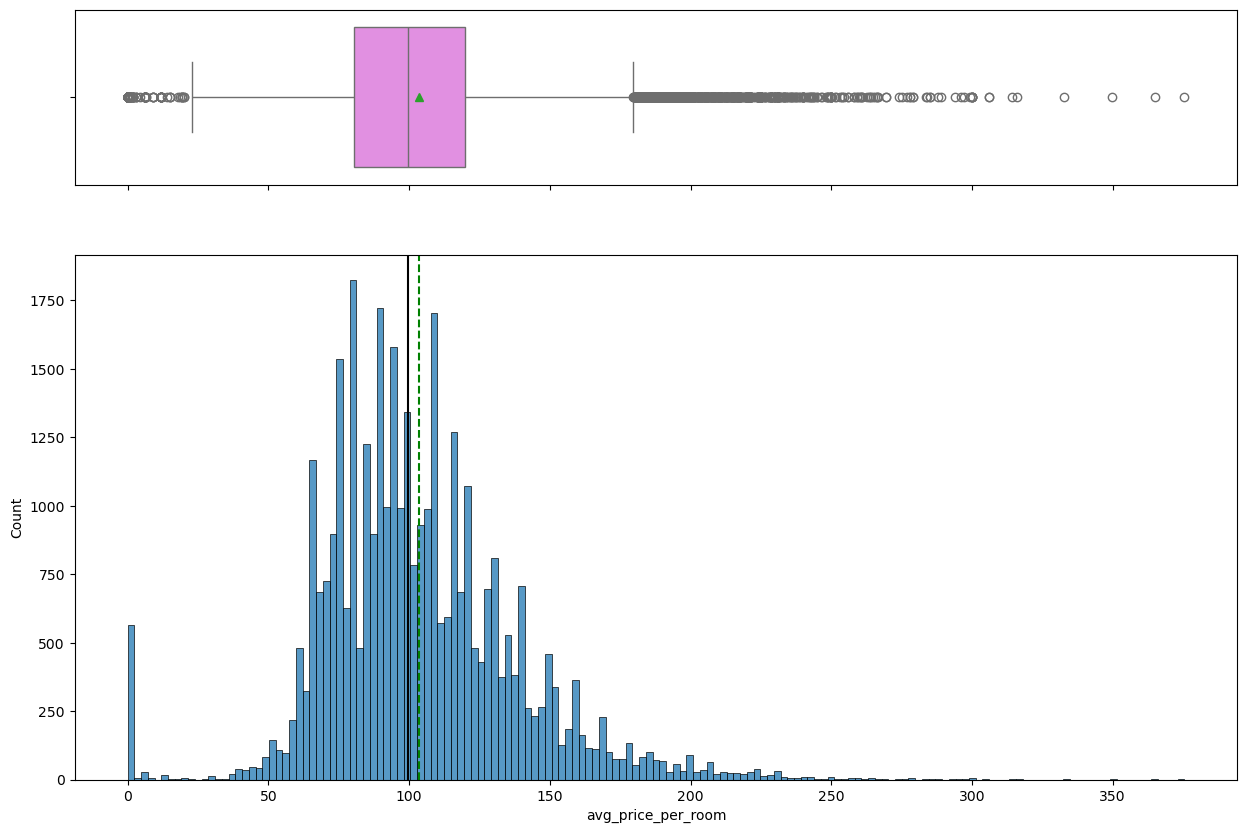

In [3806]:
histogram_boxplot(data, "avg_price_per_room")	

# Distribution of no of special requests

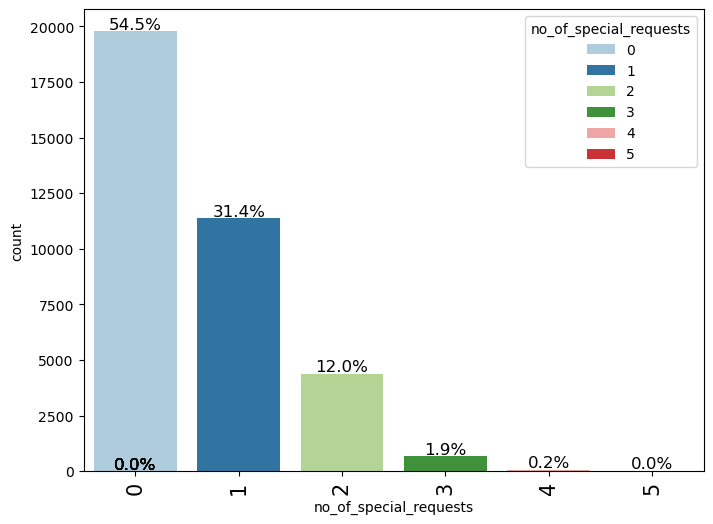

In [3808]:
labeled_barplot(data, "no_of_special_requests",perc=True)	

* Most of the customers does not have any special requests
  

### Categorical variables Univariate Analysis

# Distribution of type of meal plan

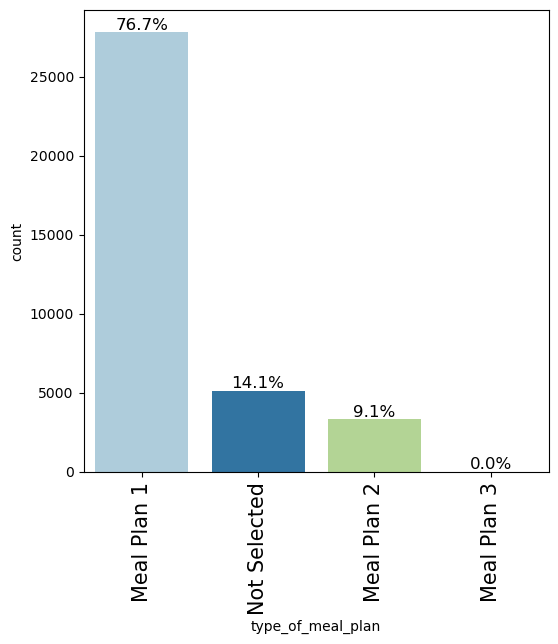

In [3812]:
labeled_barplot(data, "type_of_meal_plan",perc=True)

* Most of the customers preffered Meal Plan 1 i.e only break fast
* 14% customers did not prefer any

# Distribution of room type reserved

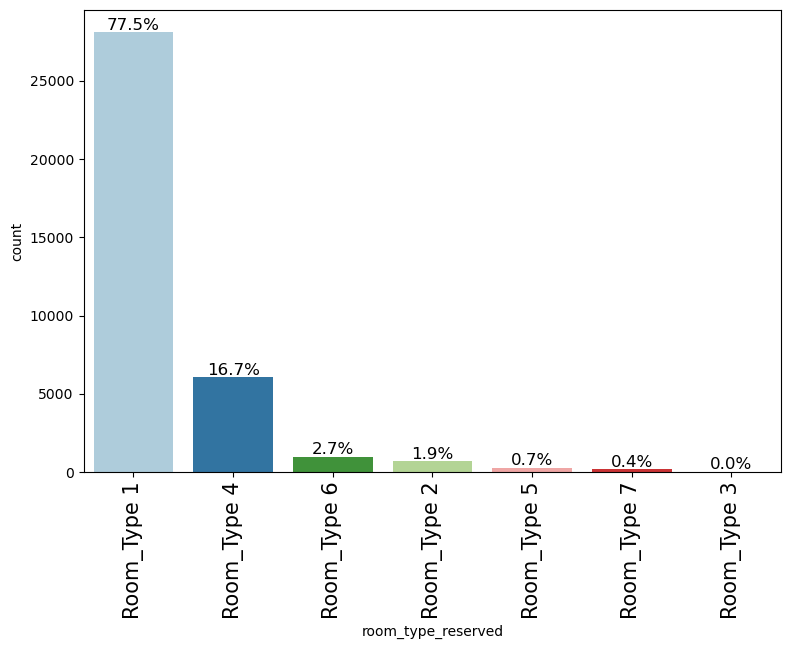

In [3815]:
labeled_barplot(data, "room_type_reserved",perc=True)

* Most of the customers preferred Room Type 1
* Second most preferred is Room_Type4

# Distribution of Market segment type

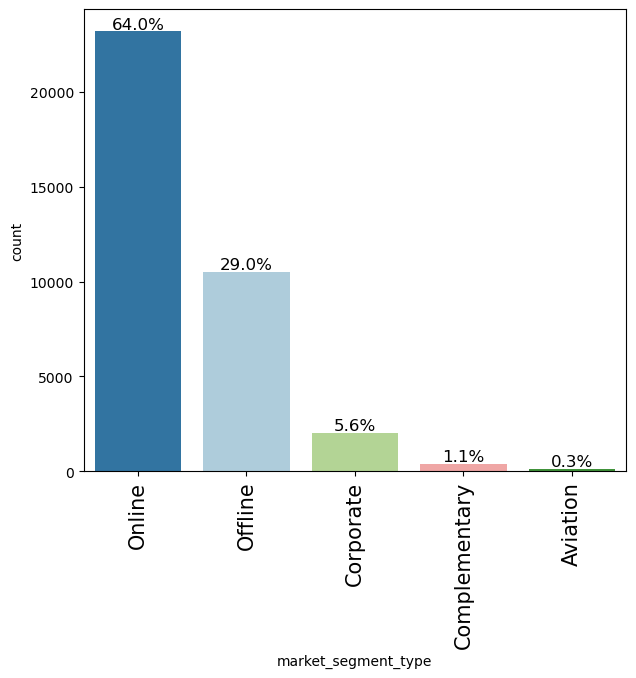

In [3818]:
labeled_barplot(data, "market_segment_type",perc=True)

* 64% bookings are through online booking
* 29% are through offline
* Others are through corporate
* Some are complimentory and aviations

# Distribution of booking status

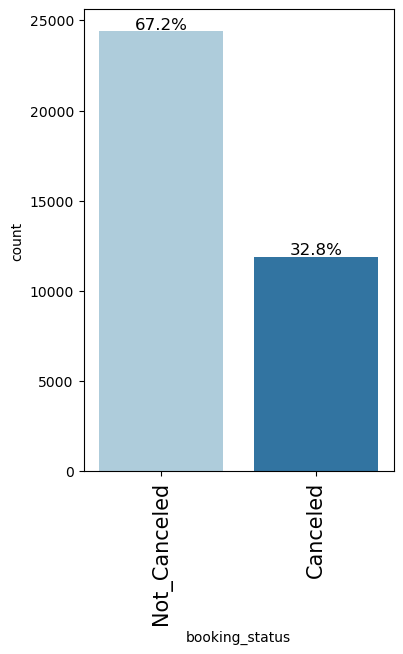

In [3821]:
labeled_barplot(data, "booking_status",perc=True)

* 67% bookings are not cancelled
* 32% booings are cancelled

* Let us encode booking status column canceled booking as 1 and not canceled 0

In [3824]:
data["booking_status"] = data["booking_status"].apply(
    lambda x: 0 if x == "Canceled" else 1
)

## Bivariate Analysis

### Correlation Analysis

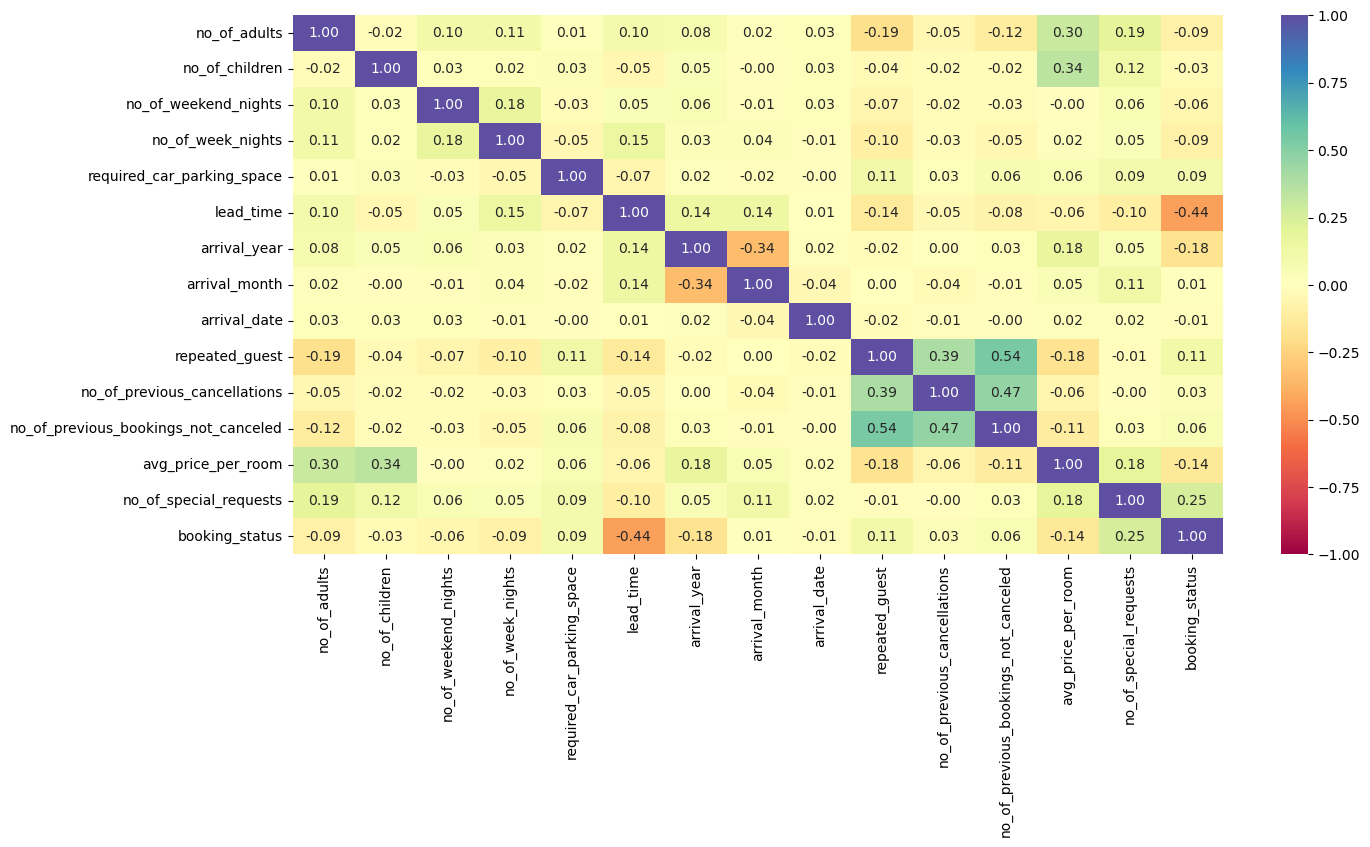

In [3827]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is hogh correlation between lead time and booking status
* There is negative correlation between no  of special requests and booking status indicating that 
* There is high correlation between no of previous booking not cancelled and repeated guests
* There is high corraltion between no of previous calcellations and no of previoud cancellation not cancelled
* There is high correlation between repeated guests and no of previous cancellation
* There is high correlation between no of adults and no of children and average price of room
  

# Observation on Market segment type Vs Average price

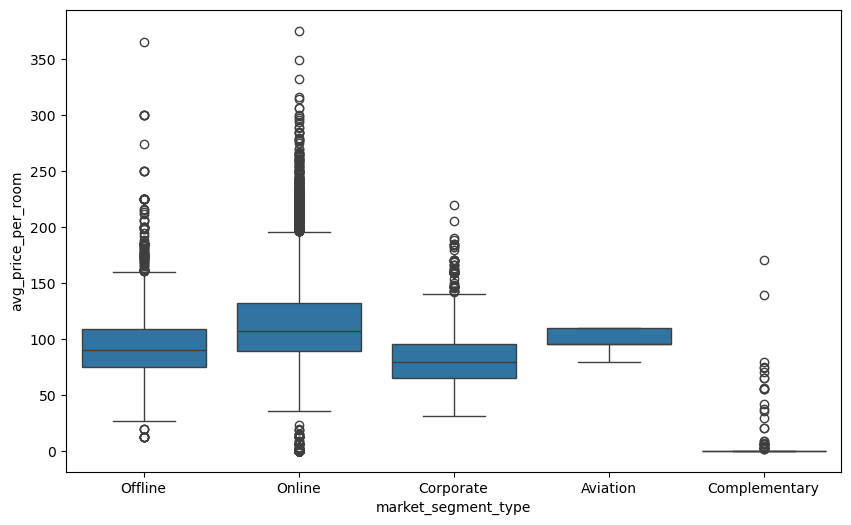

In [3830]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room")
plt.show()

* There dynamic pricing observed with online booking

# Observation on booking_status and type of meal plan

booking_status         0      1    All
type_of_meal_plan                     
All                11885  24390  36275
Meal Plan 1         8679  19156  27835
Not Selected        1699   3431   5130
Meal Plan 2         1506   1799   3305
Meal Plan 3            1      4      5
------------------------------------------------------------------------------------------------------------------------


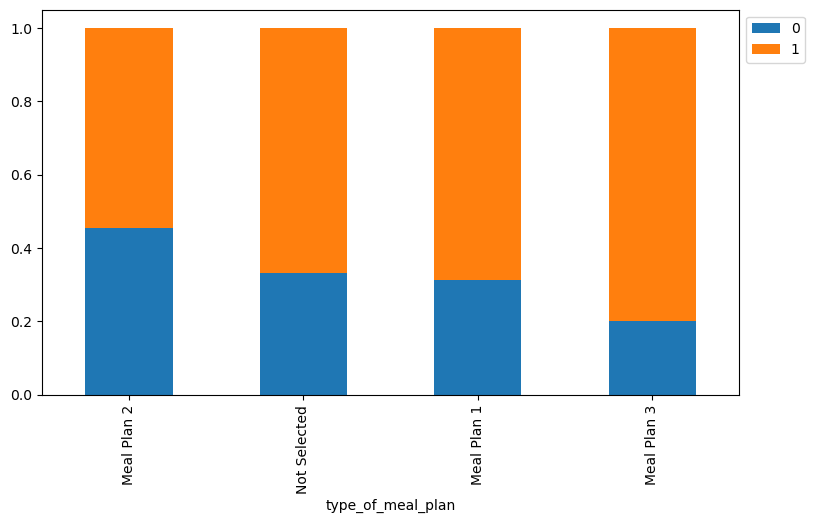

In [3833]:
stacked_barplot(data, "type_of_meal_plan","booking_status")

* There are more cancellations with meal plan 1

# Observation on booking_status and room type reserved

booking_status          0      1    All
room_type_reserved                     
All                 11885  24390  36275
Room_Type 1          9072  19058  28130
Room_Type 4          2069   3988   6057
Room_Type 6           406    560    966
Room_Type 2           228    464    692
Room_Type 5            72    193    265
Room_Type 7            36    122    158
Room_Type 3             2      5      7
------------------------------------------------------------------------------------------------------------------------


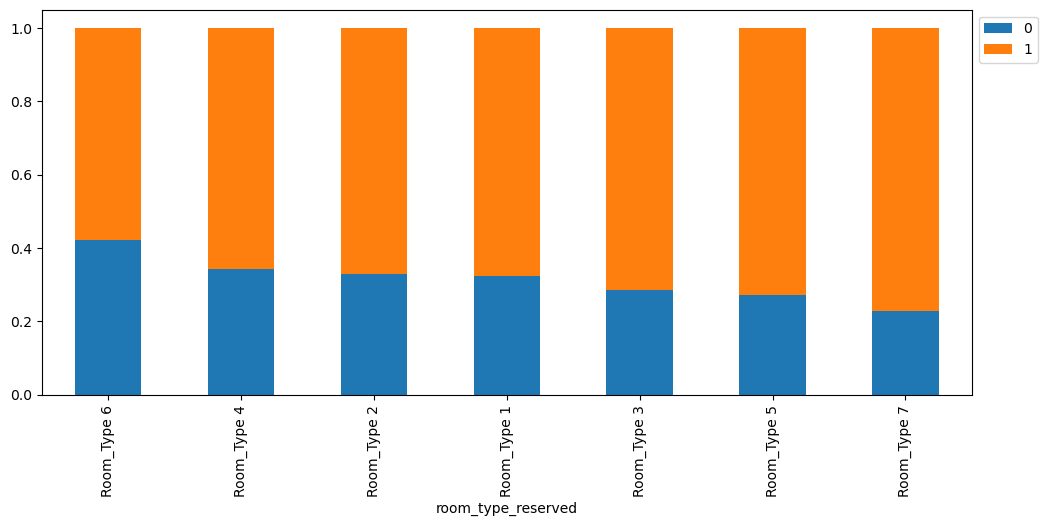

In [3836]:
stacked_barplot(data, "room_type_reserved","booking_status")

* There are more cancellations with room type1

# Observation on booking_status and market segment type

booking_status           0      1    All
market_segment_type                     
All                  11885  24390  36275
Online                8475  14739  23214
Offline               3153   7375  10528
Corporate              220   1797   2017
Aviation                37     88    125
Complementary            0    391    391
------------------------------------------------------------------------------------------------------------------------


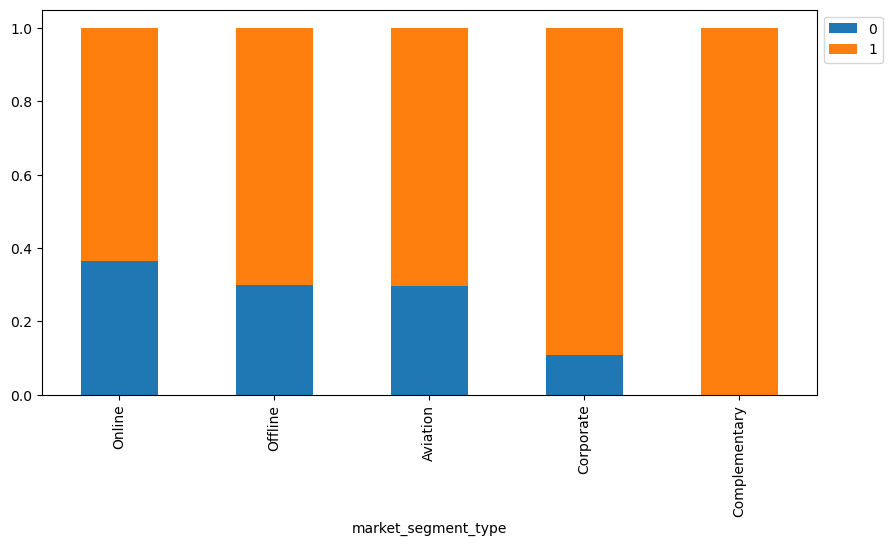

In [3839]:
stacked_barplot(data,'market_segment_type','booking_status')

* There are more cancellation with the booking which are booked through online

# Observation on repeated guests Vs booking status

booking_status      0      1    All
repeated_guest                     
All             11885  24390  36275
0               11869  23476  35345
1                  16    914    930
------------------------------------------------------------------------------------------------------------------------


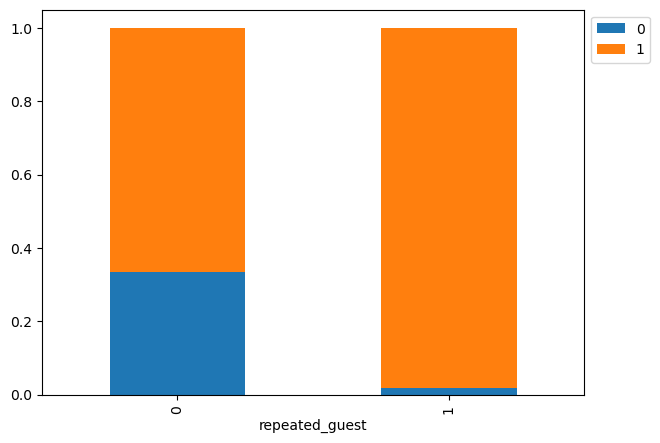

In [3842]:

stacked_barplot(data,'repeated_guest', 'booking_status')

* Repeated customer is important to the business as he is impressed with the business and can get more leads
* Repeated customer is having lower cancellation rate

# Obsrvation on no of special requests Vs booking status

booking_status              0      1    All
no_of_special_requests                     
All                     11885  24390  36275
0                        8545  11232  19777
1                        2703   8670  11373
2                         637   3727   4364
3                           0    675    675
4                           0     78     78
5                           0      8      8
------------------------------------------------------------------------------------------------------------------------


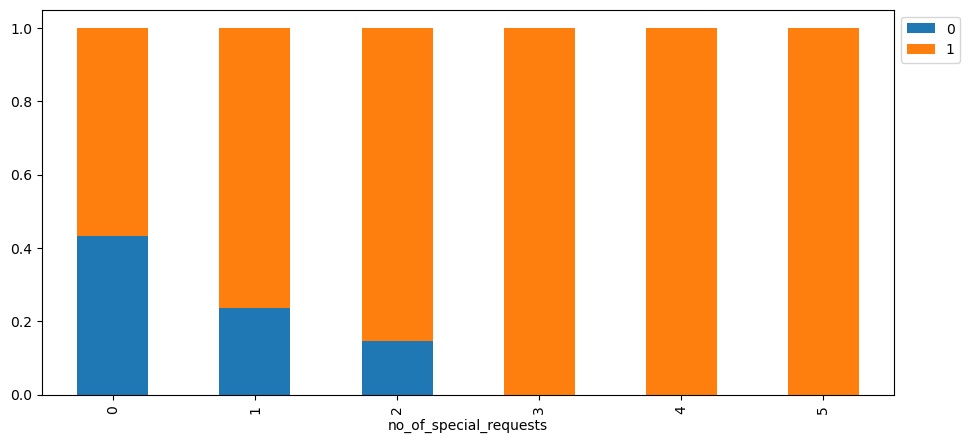

In [3845]:
stacked_barplot(data,'no_of_special_requests','booking_status')

* As special requirements increases cancellation rate is dicreasing and vice versa i.e customer with more special requirement confirms the booking and will not cancel
* 0 special requirements more cancellation rate is observed

# Observation on average price Vs arrival month

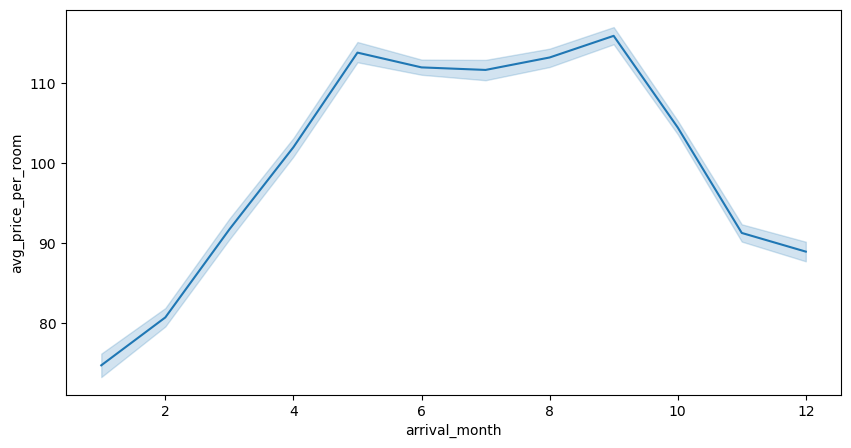

In [3848]:
plt.figure(figsize=(10, 5))
sns.lineplot(y=data["avg_price_per_room"], x=data["arrival_month"])
plt.show()

* Average price of the room is high starting from April May to october
* Price is low in the month of jan feb and december

# Observation on arrival month Vs booking status

booking_status      0      1    All
arrival_month                      
All             11885  24390  36275
10               1880   3437   5317
9                1538   3073   4611
8                1488   2325   3813
7                1314   1606   2920
6                1291   1912   3203
4                 995   1741   2736
5                 948   1650   2598
11                875   2105   2980
3                 700   1658   2358
2                 430   1274   1704
12                402   2619   3021
1                  24    990   1014
------------------------------------------------------------------------------------------------------------------------


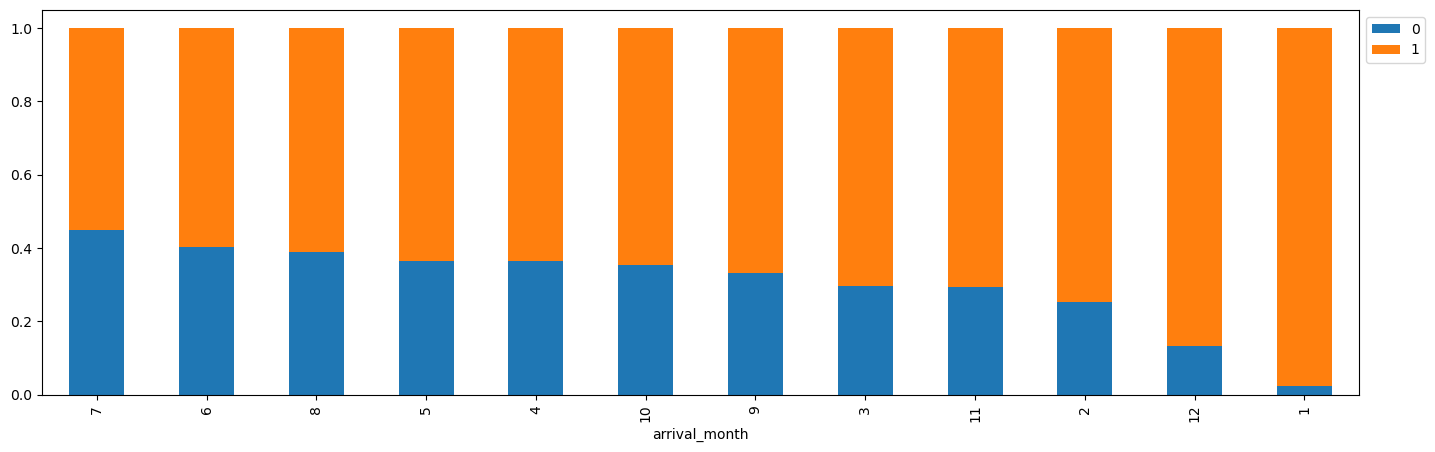

In [3851]:
# Percentage of bookings canceled each month

stacked_barplot(data, "arrival_month", "booking_status")

* Cancellation is more in july

# Observation on average price Vs booking status

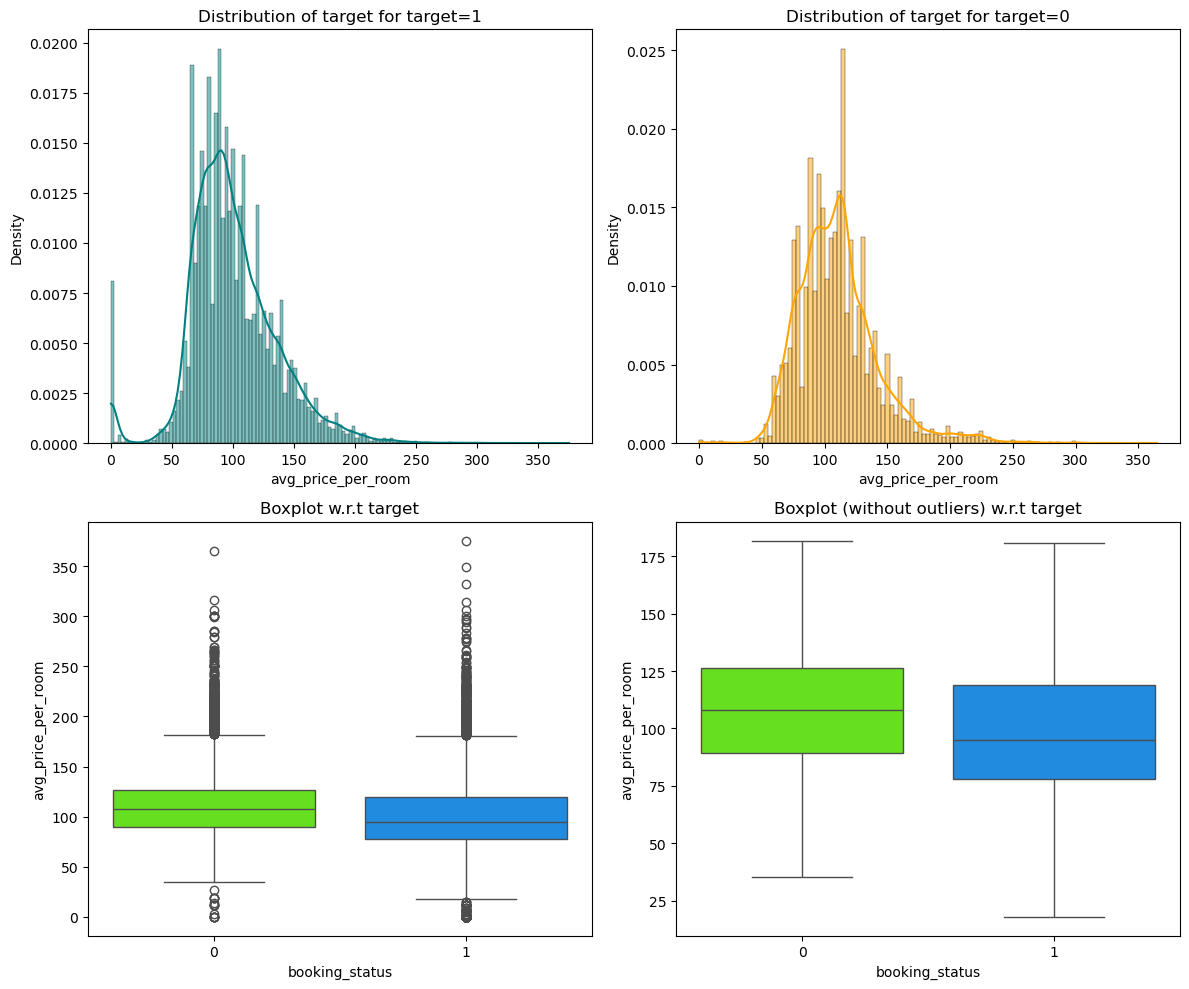

In [3854]:
# Distribution between Average price per room and booking status

distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* As price is  increasing cancellation rate is increasing

# Observation on lead time Vs booking status

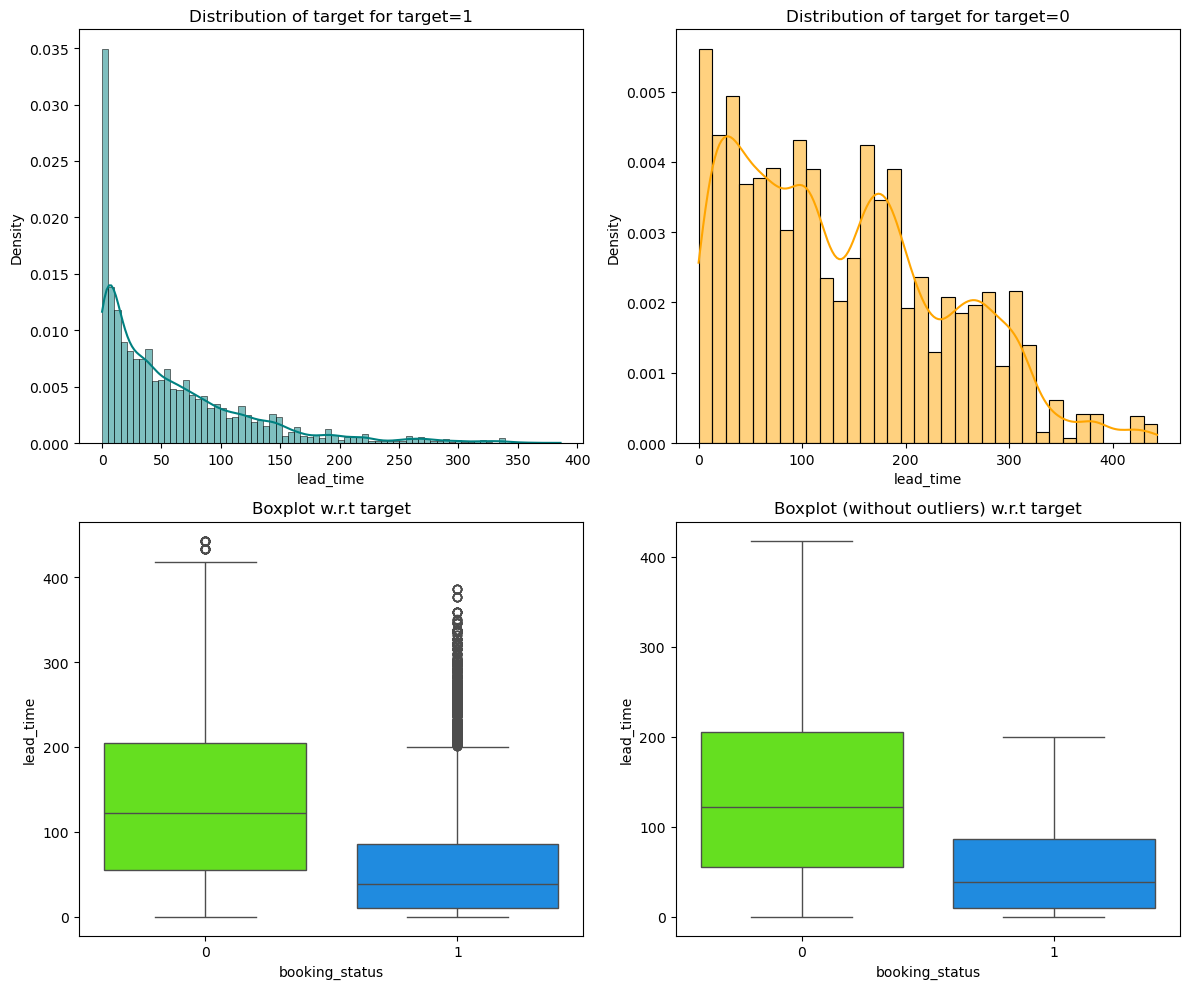

In [3857]:
# Distribution between Lead time and booking status

distribution_plot_wrt_target(data, "lead_time", "booking_status")

* Rate of cancellation is low for the one  who booked the rooms well inadvance 

# Observation on previous booking not cancelled Vs repeated guests

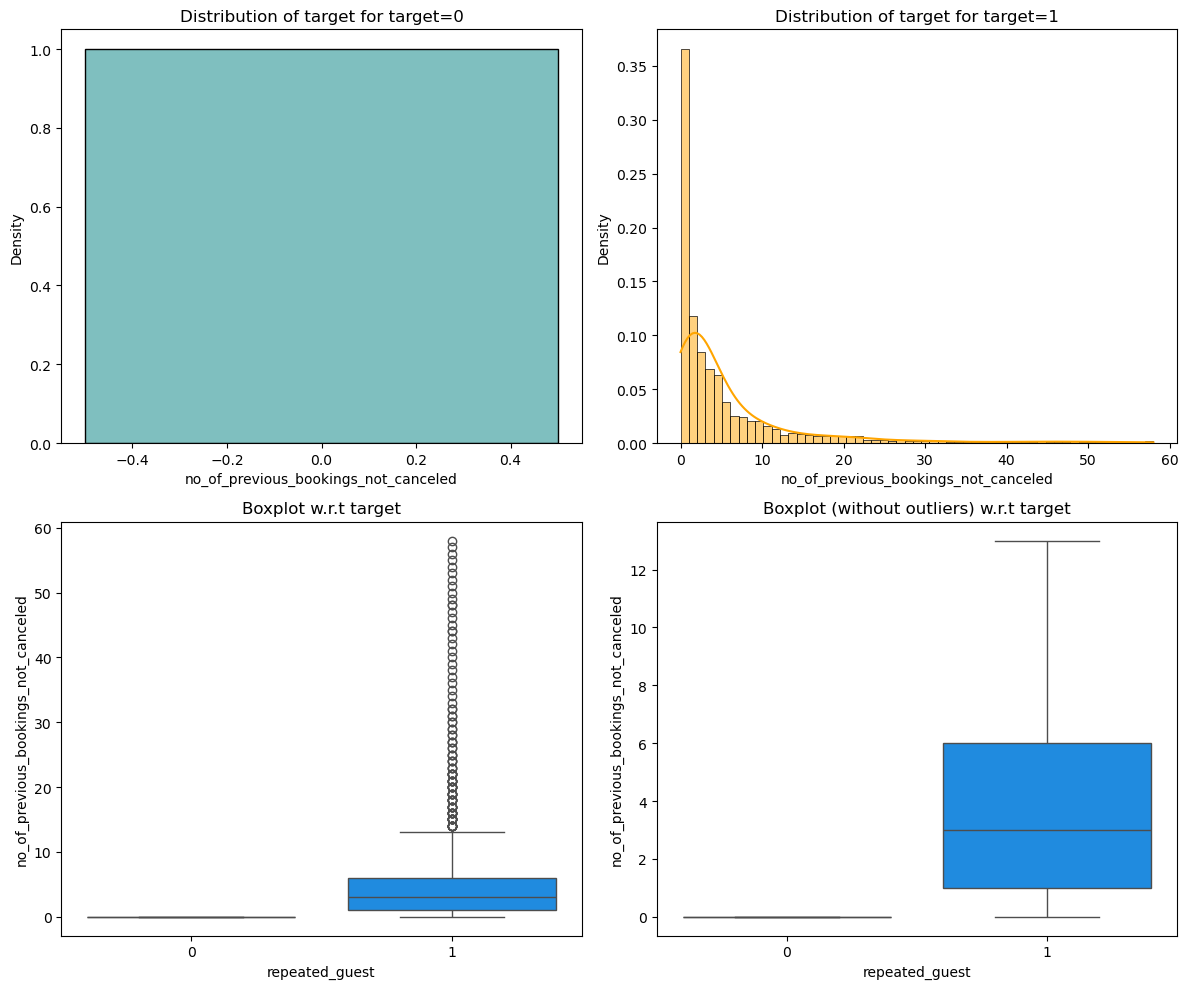

In [3860]:


distribution_plot_wrt_target(data, "no_of_previous_bookings_not_canceled", "repeated_guest")

* cancellation rate is low for repeated guests

# Observation on no of family members Vs booking status

booking_status           0      1    All
no_of_family_members                    
All                   9985  18456  28441
2                     8213  15506  23719
3                     1368   2425   3793
4                      398    514    912
5                        5     10     15
11                       1      0      1
12                       0      1      1
------------------------------------------------------------------------------------------------------------------------


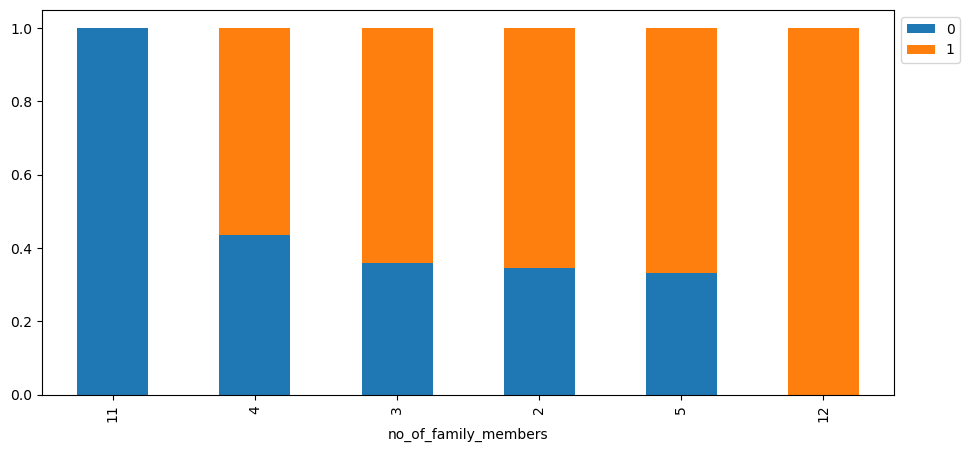

In [3863]:
# Combining children and adults to families

family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)]
family_data.shape
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)
# Plotting Number of families and booking status

stacked_barplot(family_data, "no_of_family_members", "booking_status")

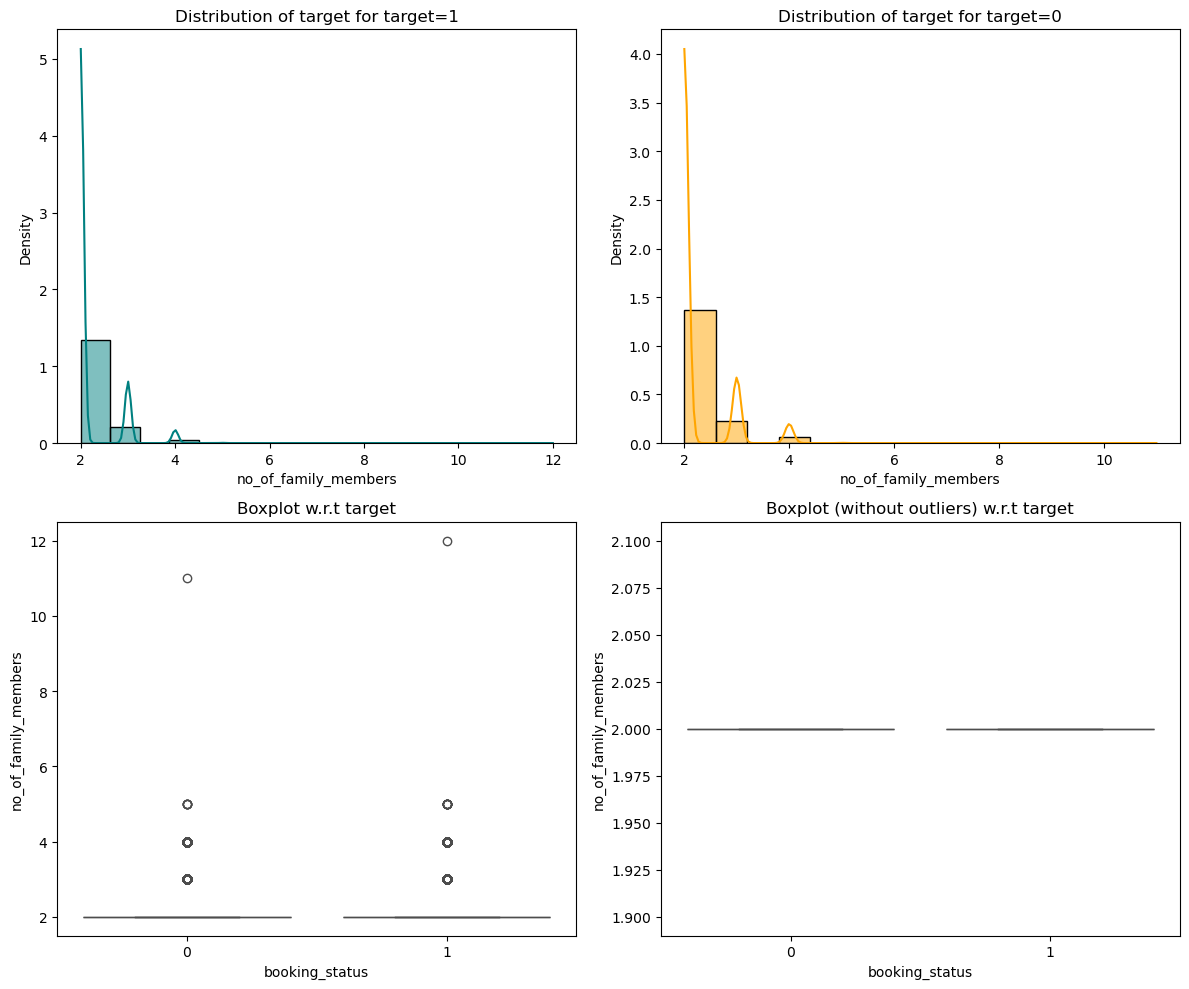

In [3864]:
distribution_plot_wrt_target(family_data, "no_of_family_members", "booking_status")

# Observation on No of days stays Vs booking status

booking_status     0      1    All
total_days                        
All             6115  10979  17094
3               2183   3689   5872
4               1387   2977   4364
5                738   1593   2331
2                639   1301   1940
6                465    566   1031
7                383    590    973
8                 79    100    179
10                58     51    109
9                 53     58    111
14                27      5     32
15                26      5     31
13                15      3     18
12                15      9     24
11                15     24     39
20                 8      3     11
19                 5      1      6
16                 5      1      6
17                 4      1      5
18                 3      0      3
21                 3      1      4
22                 2      0      2
23                 1      1      2
24                 1      0      1
------------------------------------------------------------------------------------------

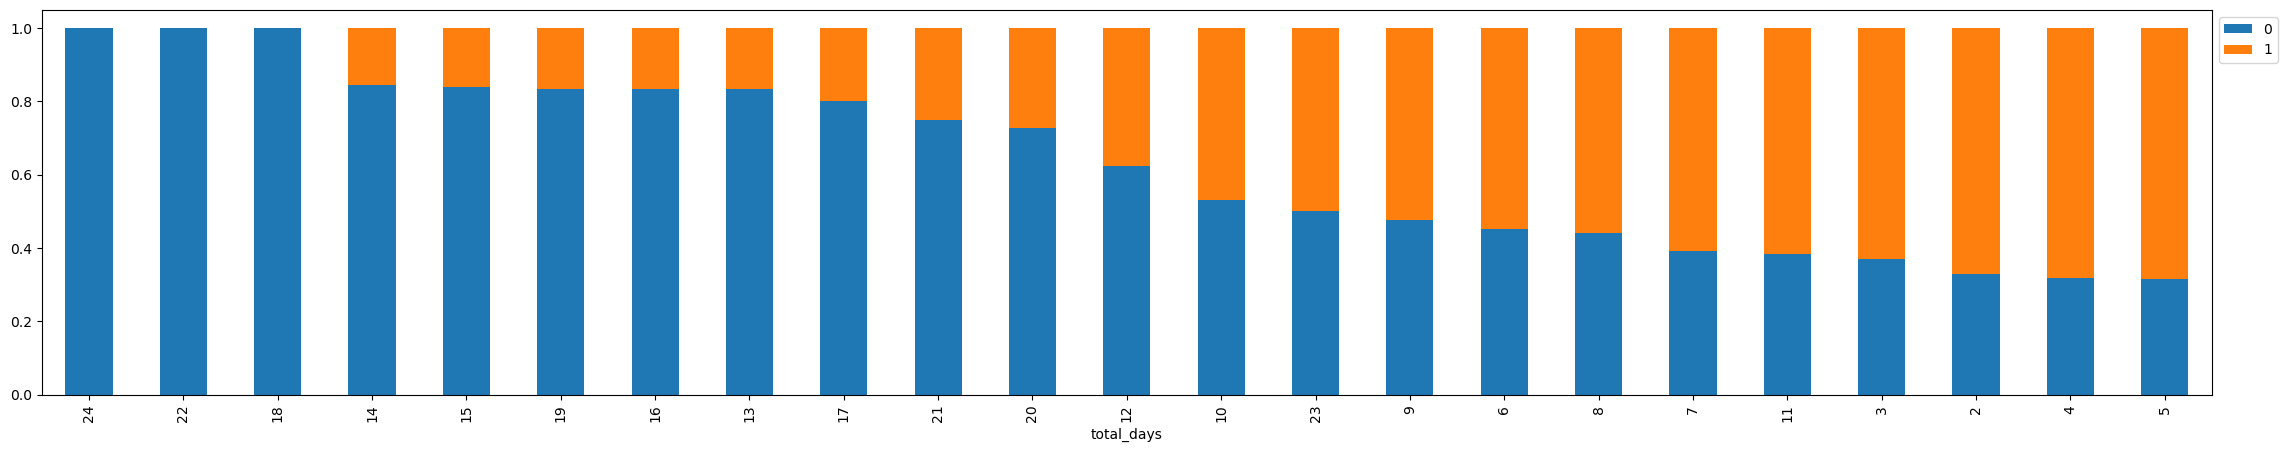

In [3866]:
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)]
stay_data["total_days"] = (stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"])

stacked_barplot(stay_data, "total_days", "booking_status")

* The above graph is showing the chances of increase in cancellation rate as customer plans to stay more days 

# Data Preprocessing

# Outlier check

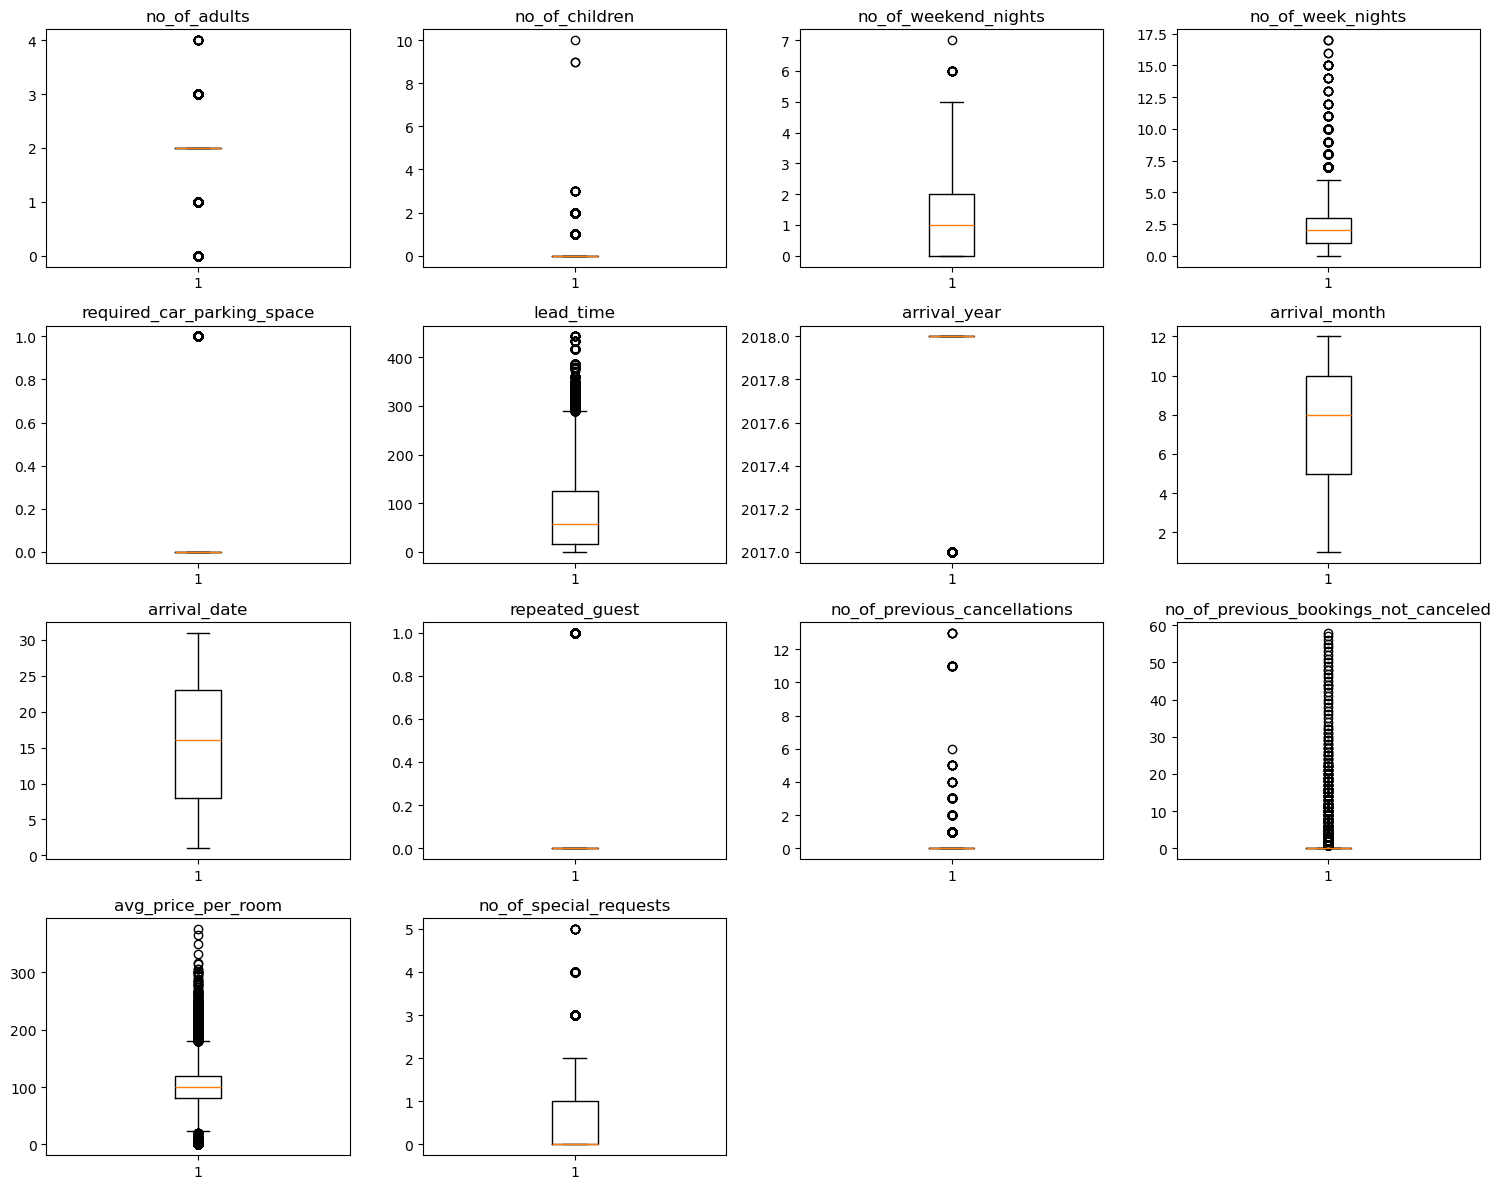

In [3870]:
# checking for outliers using boxplot by dropping booking status

numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* There are quite few outliers in the data 
* However we will not adrress then as they are proper value 

# Data Preperation for modelling

* We need to predict in which case bookings are getting cancelled in advance
* Before we proceed to build a model, we'll have to encode categorical features.
* We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [3874]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) # Encoding the Categorical features
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00000,0,False,False,False,False,False,False,False,False,False,False,False,True,False
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68000,1,False,False,True,False,False,False,False,False,False,False,False,False,True
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00000,0,False,False,False,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00000,0,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50000,0,False,False,True,False,False,False,False,False,False,False,False,False,True


In [3875]:
#viewing all of the variables in X to make sure dummy variables are correctly created
X.count()

no_of_adults                            36275
no_of_children                          36275
no_of_weekend_nights                    36275
no_of_week_nights                       36275
required_car_parking_space              36275
lead_time                               36275
arrival_year                            36275
arrival_month                           36275
arrival_date                            36275
repeated_guest                          36275
no_of_previous_cancellations            36275
no_of_previous_bookings_not_canceled    36275
avg_price_per_room                      36275
no_of_special_requests                  36275
type_of_meal_plan_Meal Plan 2           36275
type_of_meal_plan_Meal Plan 3           36275
type_of_meal_plan_Not Selected          36275
room_type_reserved_Room_Type 2          36275
room_type_reserved_Room_Type 3          36275
room_type_reserved_Room_Type 4          36275
room_type_reserved_Room_Type 5          36275
room_type_reserved_Room_Type 6    

In [3876]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)

In [3877]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2.00000,0.00000,1.00000,2.00000,0.00000,224.00000,2017.00000,10.00000,2.00000,0.00000,0.00000,0.00000,65.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
1,2.00000,0.00000,2.00000,3.00000,0.00000,5.00000,2018.00000,11.00000,6.00000,0.00000,0.00000,0.00000,106.68000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
2,1.00000,0.00000,2.00000,1.00000,0.00000,1.00000,2018.00000,2.00000,28.00000,0.00000,0.00000,0.00000,60.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
3,2.00000,0.00000,0.00000,2.00000,0.00000,211.00000,2018.00000,5.00000,20.00000,0.00000,0.00000,0.00000,100.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
4,2.00000,0.00000,1.00000,1.00000,0.00000,48.00000,2018.00000,4.00000,11.00000,0.00000,0.00000,0.00000,94.50000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000


In [3878]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
1   0.67238
0   0.32762
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
1   0.67233
0   0.32767
Name: proportion, dtype: float64


### Model can make wrong predictions as:
1. Predicting a customer will cancel the bookimg but in reality the customer will not cancel  - False negative
2. Predicting a customer will not cancel the booking  but in reality the customer will cancel - False positive

### Which case is more important?
Both the cases are important as:

* If we predict that a booking will not be canceled and the booking gets canceled then the hotel will lose resources and will have to bear additional costs 

* If we predict that a booking will get canceled and the booking doesn't get canceled the hotel might not be able to provide satisfactory services to the customer by assuming that this booking will be canceled. This might damage brand equity.

### How to reduce this loss i.e need to reduce False Negatives?

* The hotel would want the F1 Score to be maximized, the greater the F1 score, the higher the chances of minimizing False Negatives and False Positives.

#### functions to calculate different metrics and confusion matrix 


In [3881]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    prob_pred = model.predict(predictors)
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

## Logistic Regression (with Statsmodel)

In [3883]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.3282
Time:                        17:44:29   Log-Likelihood:                -10789.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_adults                            -0.0697      0.037     -1.859      0.063      -0.143       0.004
no_of_children                          -0.1207      

**Observations**

- Negative values of the coefficient show that the probability of cancelling the booking decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of cancelling the booking decreases increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

In [3885]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    # Converting predictors to float32 to avoid the error
    prob_pred = model.predict(predictors.astype(np.float32))  
    class_pred = [1 if i >= threshold else 0 for i in prob_pred]

    acc = accuracy_score(target, class_pred)  # to compute Accuracy
    recall = recall_score(target, class_pred)  # to compute Recall
    precision = precision_score(target, class_pred)  # to compute Precision
    f1 = f1_score(target, class_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

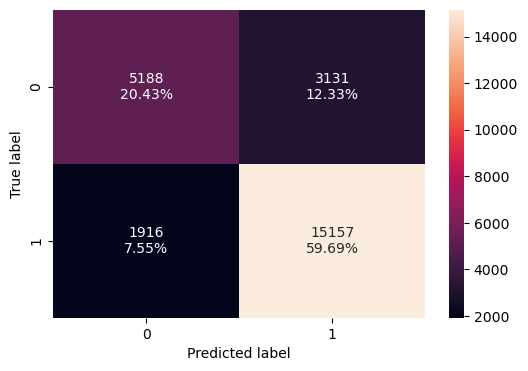

In [3886]:
# Convert to float because if you do not it causes problems when creating the confusion matrix
X_train = X_train.astype(float)

# Display the confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train)

### Checking Logistic Regression model performance on training set

In [3888]:
print("Training performance:")
model_performance_classification(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80124,0.88778,0.82879,0.85727


### Checking Logistic Regression model performance on test set

In [3890]:
log_reg_model_test_perf = model_performance_classification(lg, X_test, y_test) 

print("Test performance:")
log_reg_model_test_perf 

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80474,0.88547,0.83428,0.85911


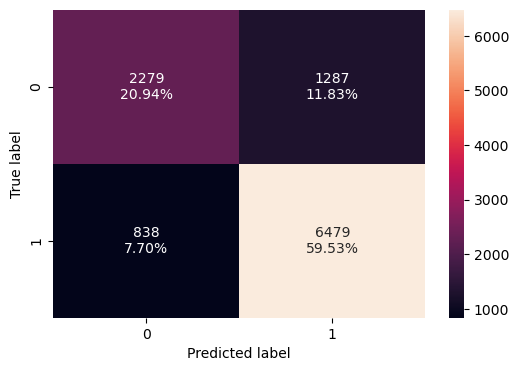

In [3891]:
confusion_matrix_statsmodels(lg, X_test, y_test)

**Observations**

- The f1_score of the model is ~0.85 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

# **Model Performance Improvement**

## Logistic Regression (deal with multicollinearity, remove high p-value variables, determine optimal threshold 	using ROC curve)

### Logistic Regression - Dealing with Multicollinearity

There are different ways of detecting (or testing for) multicollinearity. One such way is using the Variation Inflation Factor (VIF).

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of thumb**:
  - If VIF is 1 then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence  the variance of $\beta_k$ is not inflated at all
  - If VIF exceeds 5, we say there is moderate multicollinearity
  - If VIF is equal or exceeding 10, it shows signs of high multi-collinearity

* The purpose of the analysis should dictate which threshold to use

In [3897]:
def calculate_vif(idf):
    """
    Calculate Variance Inflation Factor (VIF) for each variable in a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame containing numerical variables.

    Returns:
    vif_df (DataFrame): DataFrame containing variable names and their corresponding VIF values.
    """
    variables = idf.values
    vif_df = pd.DataFrame()
    vif_df["Variable"] = idf.columns
    vif_df["VIF"] = [variance_inflation_factor(variables, i) for i in range(idf.shape[1])]
    return vif_df

In [3898]:

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                            18.10876
no_of_children                           2.15994
no_of_weekend_nights                     1.97370
no_of_week_nights                        3.76432
required_car_parking_space               1.06874
lead_time                                2.45396
arrival_year                           337.08832
arrival_month                            7.17852
arrival_date                             4.19670
repeated_guest                           1.82865
no_of_previous_cancellations             1.37223
no_of_previous_bookings_not_canceled     1.64514
avg_price_per_room                      18.35732
no_of_special_requests                   2.01520
type_of_meal_plan_Meal Plan 2            1.31693
type_of_meal_plan_Meal Plan 3            1.02578
type_of_meal_plan_Not Selected           1.44204
room_type_reserved_Room_Type 2           1.11765
room_type_reserved_Room_Type 3           1.00342
room_type_reserved_Room_Type 4    

* Market segment type online and offline ,corporate ,arrival year and no of adults have very high VIF,let us drop on by one

In [3900]:
# Let's drop the market_segment_type_Online column from both the x_train and x_test data frames
col_to_drop = "arrival_year"
X_train1 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
X_test1 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

In [3901]:
# Reassess the VIF values
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                           18.03710
no_of_children                          2.15958
no_of_weekend_nights                    1.96451
no_of_week_nights                       3.72120
required_car_parking_space              1.06864
lead_time                               2.45348
arrival_month                           7.08565
arrival_date                            4.15384
repeated_guest                          1.81768
no_of_previous_cancellations            1.37223
no_of_previous_bookings_not_canceled    1.64465
avg_price_per_room                     17.76809
no_of_special_requests                  2.01092
type_of_meal_plan_Meal Plan 2           1.31546
type_of_meal_plan_Meal Plan 3           1.02578
type_of_meal_plan_Not Selected          1.43894
room_type_reserved_Room_Type 2          1.11697
room_type_reserved_Room_Type 3          1.00341
room_type_reserved_Room_Type 4          1.63029
room_type_reserved_Room_Type 5          1.03753
room_

In [3902]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print("Training performance:")
model_performance_classification(lg1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79982,0.88643,0.82799,0.85621


* There was no significant changes in the metrix agter removal of field

In [3904]:
# Let's drop the market_segment_type_Online column from both the x_train and x_test data frames
col_to_drop = "market_segment_type_Online"
X_train2 = X_train1.loc[:, ~X_train1.columns.str.startswith(col_to_drop)]
X_test2 = X_test1.loc[:, ~X_test1.columns.str.startswith(col_to_drop)]

In [3905]:
# Reassess the VIF values
vif_series = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_adults                           13.88186
no_of_children                          2.15877
no_of_weekend_nights                    1.93503
no_of_week_nights                       3.56446
required_car_parking_space              1.06858
lead_time                               2.43615
arrival_month                           6.51938
arrival_date                            3.86830
repeated_guest                          1.81330
no_of_previous_cancellations            1.37169
no_of_previous_bookings_not_canceled    1.64459
avg_price_per_room                     13.17193
no_of_special_requests                  2.00644
type_of_meal_plan_Meal Plan 2           1.29988
type_of_meal_plan_Meal Plan 3           1.02575
type_of_meal_plan_Not Selected          1.37291
room_type_reserved_Room_Type 2          1.10445
room_type_reserved_Room_Type 3          1.00341
room_type_reserved_Room_Type 4          1.57841
room_type_reserved_Room_Type 5          1.03342
room_

In [3906]:
# Calculate VIF for the remaining features
vif_series = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
    dtype=float,
)

# Identify features with high VIF (e.g., VIF > 5 or VIF > 10)
high_vif_features = vif_series[vif_series > 5].index.tolist()

# Remove features with high VIF iteratively, reassessing VIF after each removal
# Start by removing the feature with the highest VIF and continue until all features have VIF below the threshold
while high_vif_features:
    feature_to_remove = high_vif_features[0]
    X_train2 = X_train2.drop(columns=[feature_to_remove])
    X_test2 = X_test2.drop(columns=[feature_to_remove]) 

    vif_series = pd.Series(
        [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
        index=X_train2.columns,
        dtype=float,
    )
    high_vif_features = vif_series[vif_series > 5].index.tolist()


# Refit the logistic regression model
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

no_of_children                         2.08728
no_of_weekend_nights                   1.86628
no_of_week_nights                      3.10098
required_car_parking_space             1.05882
lead_time                              2.21747
arrival_date                           3.07367
repeated_guest                         1.80795
no_of_previous_cancellations           1.36910
no_of_previous_bookings_not_canceled   1.64125
no_of_special_requests                 1.73277
type_of_meal_plan_Meal Plan 2          1.24854
type_of_meal_plan_Meal Plan 3          1.02551
type_of_meal_plan_Not Selected         1.24588
room_type_reserved_Room_Type 2         1.10349
room_type_reserved_Room_Type 3         1.00311
room_type_reserved_Room_Type 4         1.34305
room_type_reserved_Room_Type 5         1.02067
room_type_reserved_Room_Type 6         1.88887
room_type_reserved_Room_Type 7         1.08631
market_segment_type_Complementary      1.12413
market_segment_type_Corpo

# Observations
* All features now have relatively low VIF values indicating that multi-collinearity has been resolved.
* Let us rebuild the model and reassess the model's performance metrics.

In [3908]:
print("Training performance:")
model_performance_classification(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78623,0.87671,0.81833,0.84651


* There was no much difference in the model after removing columns ,w can proceede withthis model

# Addressing p-values >0.5

In [3911]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.2913
Time:                        17:44:39   Log-Likelihood:                -11381.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
no_of_children                          -0.2291      0.057     -4.029      0.000      -0.341      -0.118
no_of_weekend_nights                    -0.0202      

# Removing high P values

In [3913]:
# initial list of columns
cols = X_train2.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train2[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['no_of_children', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [3914]:
# Let's create new X_train and X_test sets using only the selected features (they should all have p-values < .05)
X_train3 = X_train2[selected_features]
X_test3 = X_test2[selected_features]

In [3915]:
# Review the training set feature set
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25392 entries, 27030 to 3025
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_children                        25392 non-null  float64
 1   no_of_weekend_nights                  25392 non-null  float64
 2   no_of_week_nights                     25392 non-null  float64
 3   required_car_parking_space            25392 non-null  float64
 4   lead_time                             25392 non-null  float64
 5   arrival_date                          25392 non-null  float64
 6   repeated_guest                        25392 non-null  float64
 7   no_of_previous_cancellations          25392 non-null  float64
 8   no_of_previous_bookings_not_canceled  25392 non-null  float64
 9   no_of_special_requests                25392 non-null  float64
 10  type_of_meal_plan_Meal Plan 2         25392 non-null  float64
 11  type_of_meal_plan

In [3916]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25378
Method:                           MLE   Df Model:                           13
Date:                Sun, 02 Feb 2025   Pseudo R-squ.:                  0.2859
Time:                        17:44:40   Log-Likelihood:                -11469.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
no_of_children                    -0.2791      0.041     -6.793      0.000      -0.360      -0.199
no_of_week_nights                  0.0537      0.010      5.183      0.

In [3917]:
print("Training performance:")
model_performance_classification(lg3, X_train3, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78560,0.87729,0.81726,0.84621


# Observations
The new model performance metrics are still in-line with the previous model metrics.
Therefore, we will continue to use this newest model as the metrics are comparable and it's less complex due to the additional features dropped after the p-value analysis.

# Converting coefficients to odds
The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
Therefore, odds = exp(b)
The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [3920]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.79526,0.97998,1.05843,4.35006,0.98593,1.01736,12.97415,0.79614,1.06433,4.69026,0.68420,0.00000,1.29930,2.10827,1.25117,0.90975,0.95591,0.85286,0.81811,143412836020670510923776.00000,5.43469,10.51931
Change_odd%,-20.47427,-2.00186,5.84277,335.00553,-1.40701,1.73564,1197.41478,-20.38563,6.43291,369.02558,-31.58007,-100.00000,29.93032,110.82707,25.11738,-9.02473,-4.40876,-14.71402,-18.18939,14341283602067051427921920.00000,443.46917,951.93097


## Coefficient interpretations

* no_of_children: Holding all other features constant a 1 unit change in no_of_adults will dicrease the odds of the guest cancelling by 0.79 times or a ~20.47% dicrease in odds of cancelling.

* repeat_guest: Holding all other features constant a 1 unit change in repeat_guest will increase the odds of cancelling by 12 times or a 1197 increase in odds of cancelling.

* Interpretation for other attributes can be done similarly.



# Training data performance

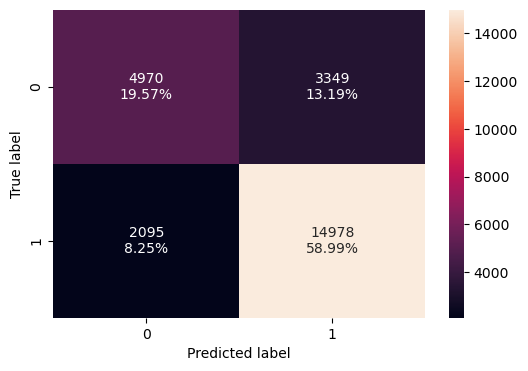

In [3923]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train3, y_train)

In [3924]:
log_reg_model_train_perf = model_performance_classification(
    lg3, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78560,0.87729,0.81726,0.84621


# Test Data performance

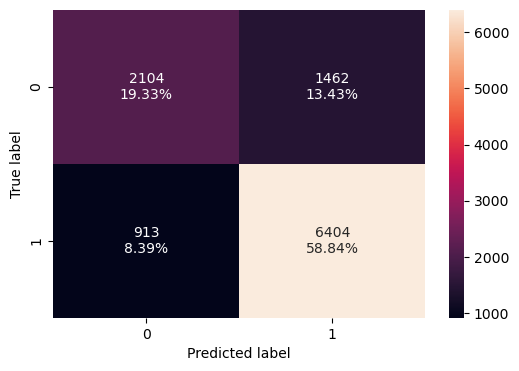

In [3926]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test)

# Observations
The model is giving a decent f1_score of ~0.846 and ~0.843 on the train and test sets respectively
The raw data had 67.2% of the bookings not cancelling. Therefore, the current model improves (accuracy is ~80.5%) over just stating all guests will not cancel.
As the train and test performances are comparable, the model is not overfitting
Moving forward we will try to improve the performance of the model

# Model Improvements
Let's see if the f1_score can be improved further by changing the model threshold
First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

# ROC Curve and ROC-AUC
ROC-AUC on training set

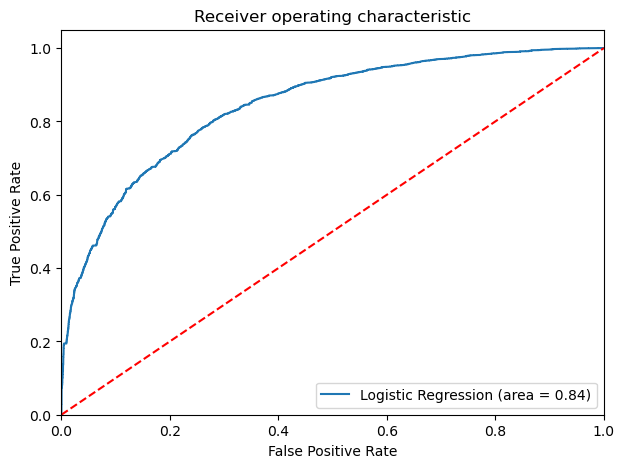

In [3930]:
# Plot the False Positive Rate (FPR) vs True Positive Rate (TPR)
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

# Optimal threshold using AUC-ROC curve

In [3933]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))

# Find the optimal threshold by finding the maximum value between TRP and FPR.
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(f"The AUC-ROC optimal threshold is {optimal_threshold_auc_roc}")

The AUC-ROC optimal threshold is 0.6124312611949606


# Checking model performance on training set using AUC-ROC optimal threshold

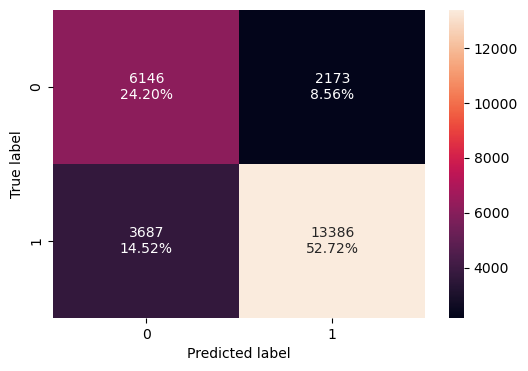

In [3935]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [3936]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification(
    lg3, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.76926,0.78410,0.86035,0.82046


* Themodel is still giving good performance

# Checking model performance on test set

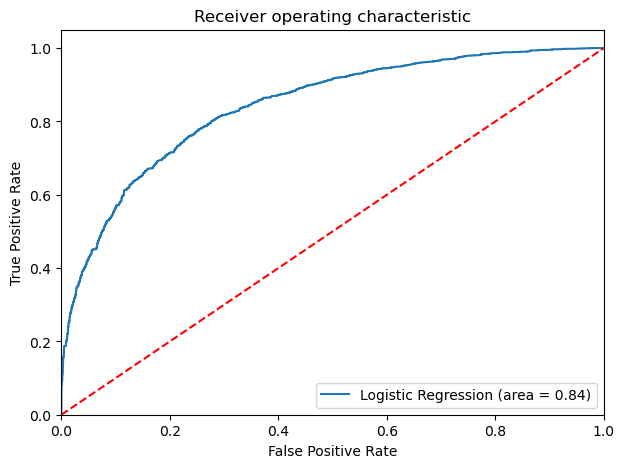

In [3939]:
# Plot the False Positive Rate (FPR) vs True Positive Rate (TPR)
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(X_test3.astype(float))) #CHANGE: Cast X_test3 to float
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3.astype(float))) #CHANGE: Cast X_test3 to float
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

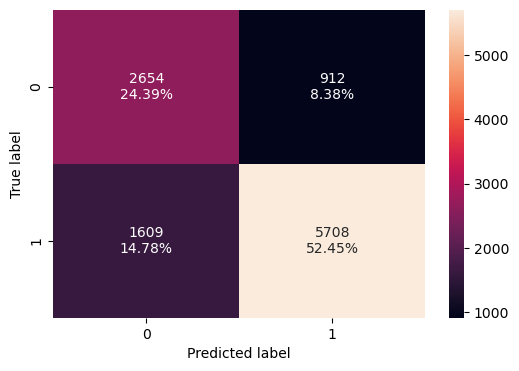

In [3940]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [3941]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification(
    lg3, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.76835,0.78010,0.86224,0.81911


* The model performs similar with both the Test and Training data sets.
*  The performance of the Logistic Regression model has improved considerably (on both training and test sets) by dropping variables with high p-values and setting an optimal threshold.

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [3945]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True) ## Complete the code to create dummies for X

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

In [3946]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [3947]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [3948]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

## Scoring our Decision Tree

In [3950]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dTree, X_train, y_train # Change model to dTree
)
decision_tree_perf_train


,Accuracy,Recall,Precision,F1
0,0.99403,0.99526,0.99581,0.99553


In [3951]:
# Import the necessary modules explicitly
from sklearn import metrics  # Or 'from sklearn.metrics import confusion_matrix, f1_score' if you only use those functions


## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    \\\\
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3952]:
##  Function to calculate recall score
def get_f1_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("f1 score on training set : ",metrics.f1_score(y_train,pred_train))
    print("f1 n test set : ",metrics.f1_score(y_test,pred_test))

## Confusion Matrix

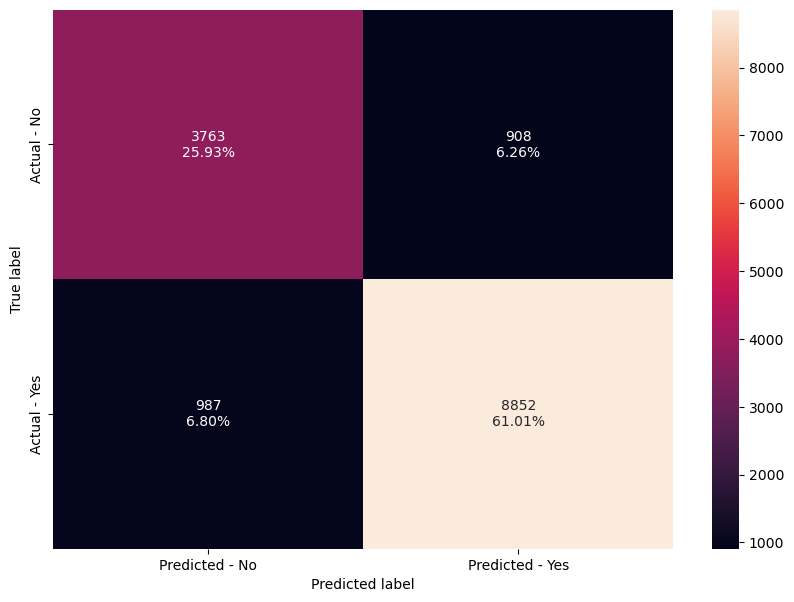

In [3954]:
make_confusion_matrix(dTree,y_test)

In [3955]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dTree, X_test, y_test # Change model to dTree
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86940,0.89968,0.90697,0.90331


## Visualizing the Decision Tree

In [3957]:
feature_names = list(X.columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


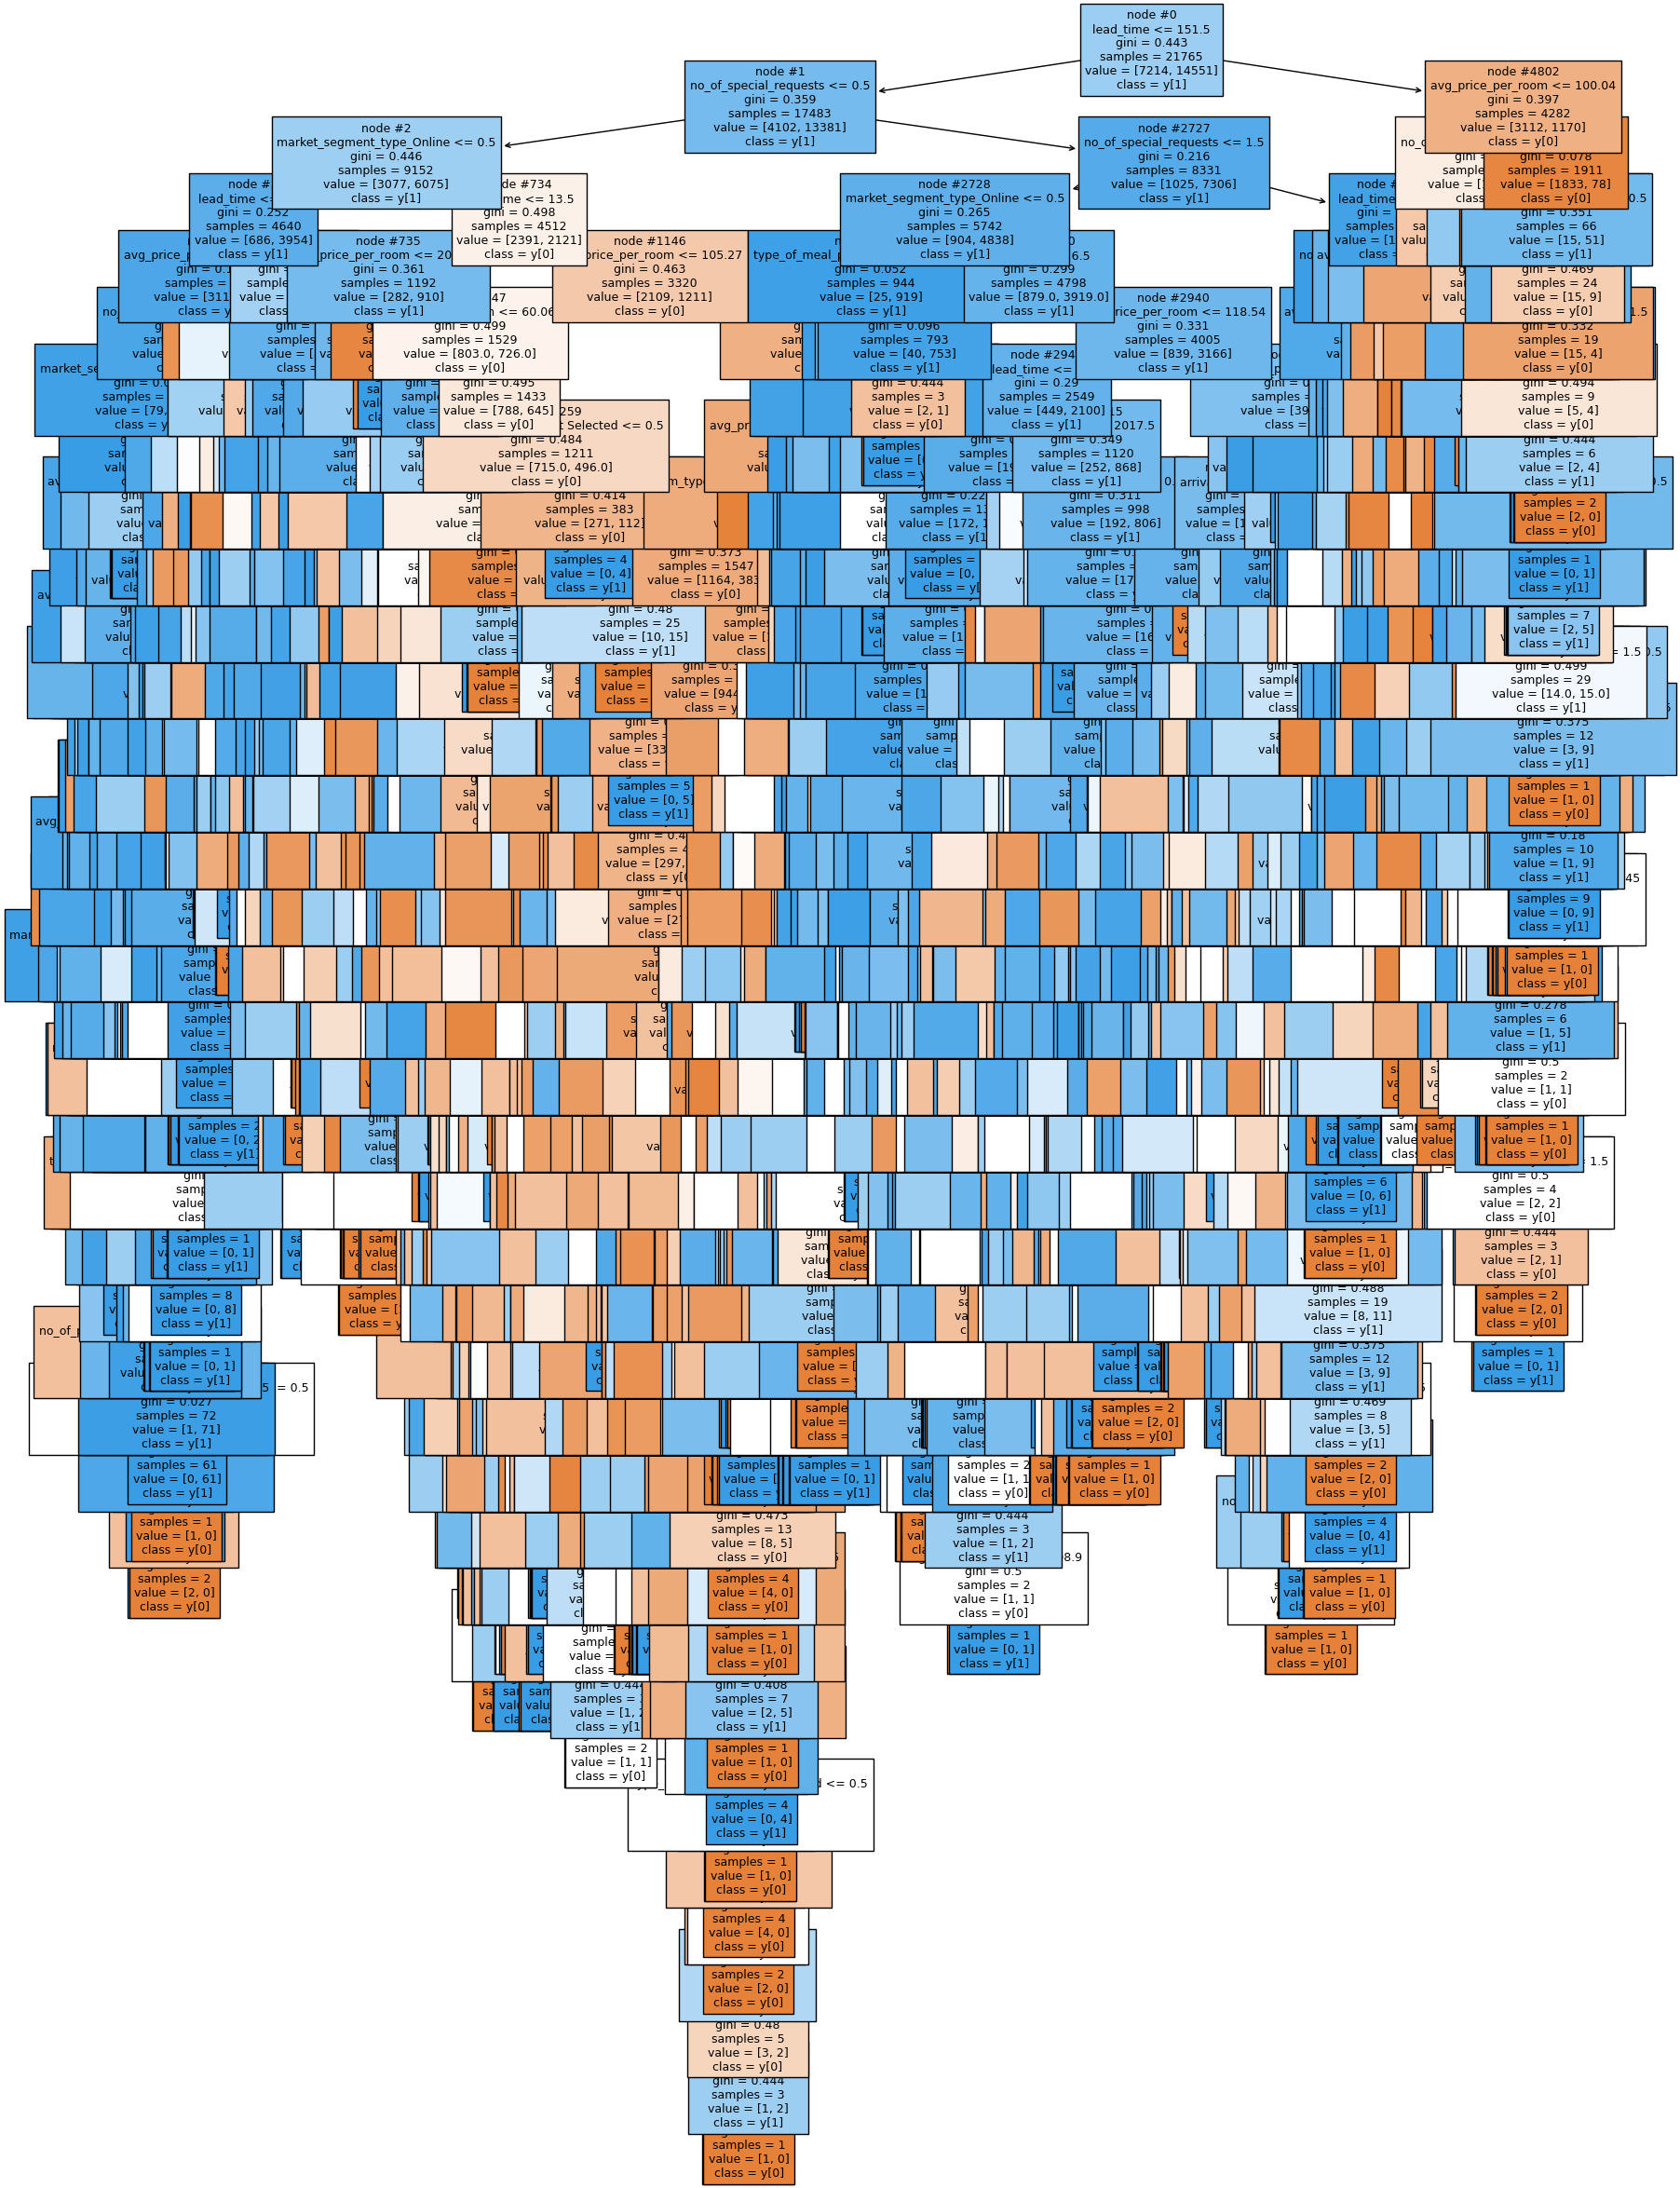

In [3958]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [3959]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- avg_price_per_room <= 201.50
|   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 54.00] class: 1
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 89.00] class: 1
|   |   |   |   |   |   |   |   |--- avg_price_per_room 

In [3960]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.35279
avg_price_per_room                   0.16863
market_segment_type_Online           0.08755
arrival_date                         0.08683
no_of_special_requests               0.06832
arrival_month                        0.06761
no_of_week_nights                    0.04798
no_of_weekend_nights                 0.03587
no_of_adults                         0.03067
arrival_year                         0.01369
type_of_meal_plan_Not Selected       0.00853
required_car_parking_space           0.00708
room_type_reserved_Room_Type 4       0.00665
no_of_children                       0.00547
market_segment_type_Offline          0.00373
type_of_meal_plan_Meal Plan 2        0.00324
room_type_reserved_Room_Type 2       0.00173
room_type_reserved_Room_Type 5       0.00136
market_segment_type_Corporate        0.00052
repeated_guest                       0.00051
room_type_reserved_Room_Type 6       0.00046
no_of_prev

* Lead time is the most important feature according to the descision tree model

**The tree above is very complex, such a tree often overfits.**

## Reducing over fitting

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting
* Let's try Limiting the max_depth of tree to 3

In [3965]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

## Confusion Matrix - decision tree with depth restricted to 3

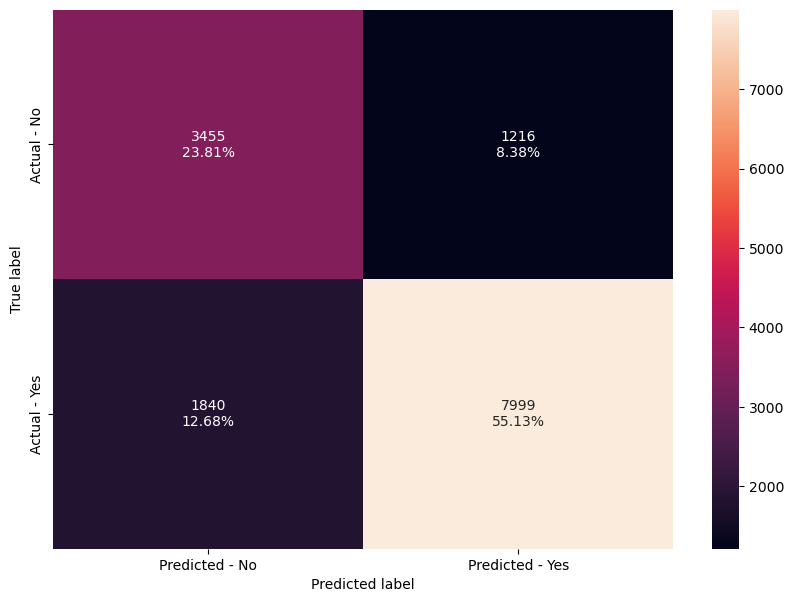

In [3967]:
make_confusion_matrix(dTree1, y_test)

In [3968]:
decision_tree_perf_train1 = model_performance_classification_sklearn(
    dTree1, X_train, y_train # Change model to dTree
)
decision_tree_perf_train1



,Accuracy,Recall,Precision,F1
0,0.78456,0.81177,0.85831,0.83439


In [3969]:
decision_tree_perf_test1 = model_performance_classification_sklearn(
    dTree1, X_test, y_test # Change model to dTree
)
decision_tree_perf_test1

,Accuracy,Recall,Precision,F1
0,0.78939,0.81299,0.86804,0.83961


* score is now comparable for test and train data

## Visualizing the Decision Tree

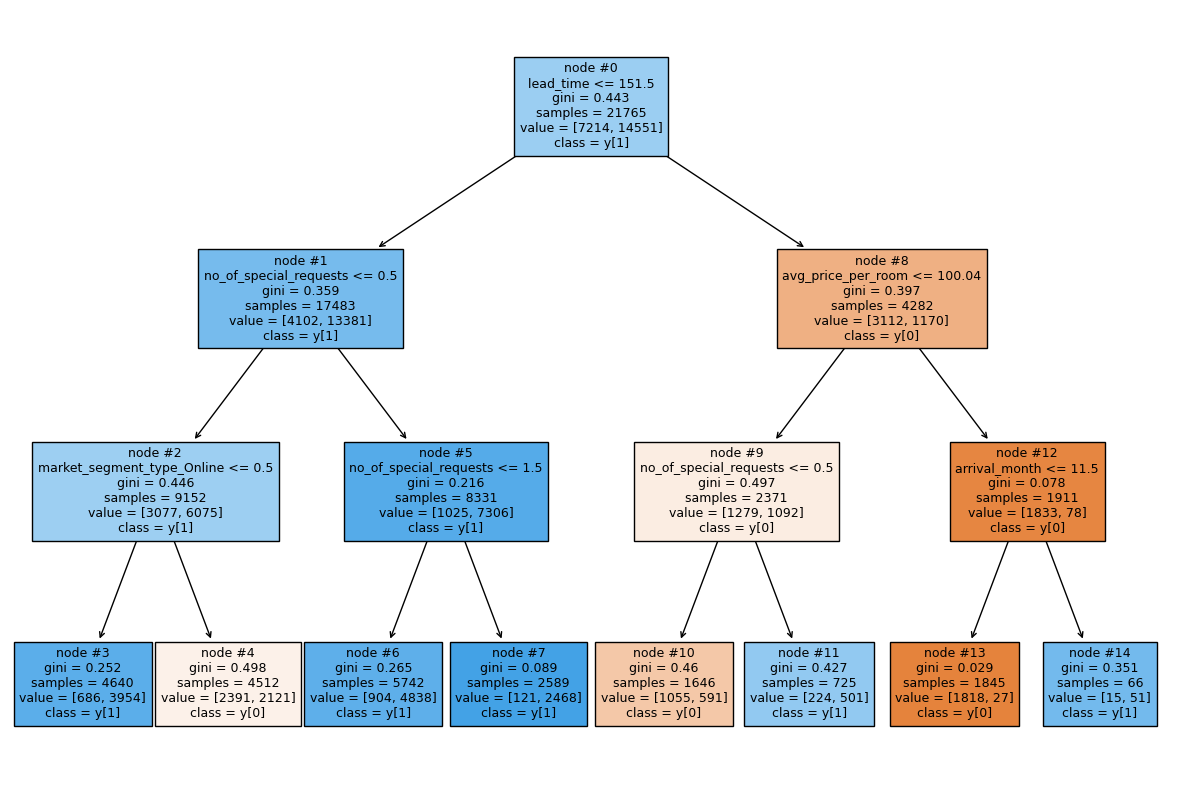

In [3972]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [3973]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [686.00, 3954.00] class: 1
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2391.00, 2121.00] class: 0
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [904.00, 4838.00] class: 1
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [121.00, 2468.00] class: 1
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [1055.00, 591.00] class: 0
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [224.00, 501.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [1818.00, 27.00] class: 0
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [15.00, 51.00] class: 1



* The tree is readable now

In [3975]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.50016
market_segment_type_Online           0.20050
no_of_special_requests               0.16542
avg_price_per_room                   0.11193
arrival_month                        0.02199
no_of_week_nights                    0.00000
type_of_meal_plan_Not Selected       0.00000
market_segment_type_Offline          0.00000
market_segment_type_Corporate        0.00000
market_segment_type_Complementary    0.00000
room_type_reserved_Room_Type 7       0.00000
room_type_reserved_Room_Type 6       0.00000
room_type_reserved_Room_Type 5       0.00000
room_type_reserved_Room_Type 4       0.00000
room_type_reserved_Room_Type 3       0.00000
room_type_reserved_Room_Type 2       0.00000
type_of_meal_plan_Meal Plan 3        0.00000
required_car_parking_space           0.00000
type_of_meal_plan_Meal Plan 2        0.00000
no_of_children                       0.00000
no_of_previous_bookings_not_canceled 0.00000
no_of_prev

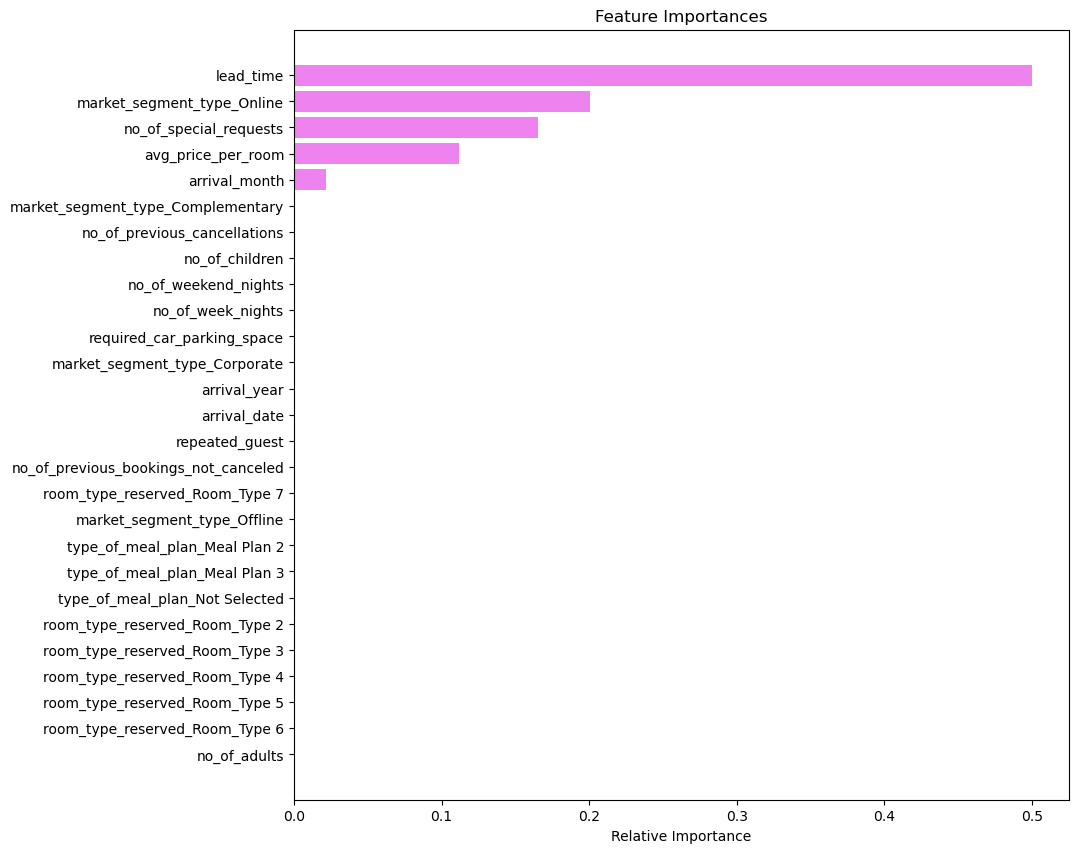

In [3976]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* There is no much change in this model compare to previous model
* But post pruning might give even better results, since there is quite a good possibility that we might neglect some hyperparameters, post pruning will take care of all that.

## Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.



In [3981]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [3982]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00755
1,0.00000,0.00755
2,0.00000,0.00755
3,0.00000,0.00755
4,0.00000,0.00756
...,...,...
1202,0.00646,0.28779
1203,0.01281,0.30060
1204,0.01713,0.31773
1205,0.02445,0.36663


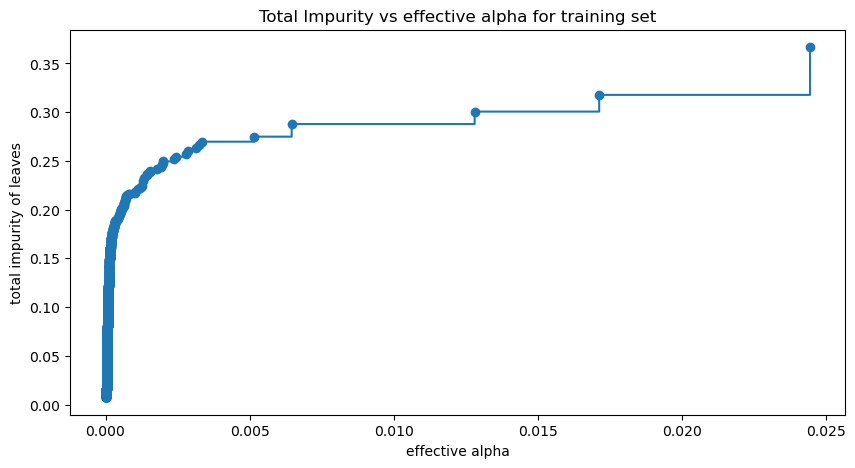

In [3983]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [3985]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0765498344481233


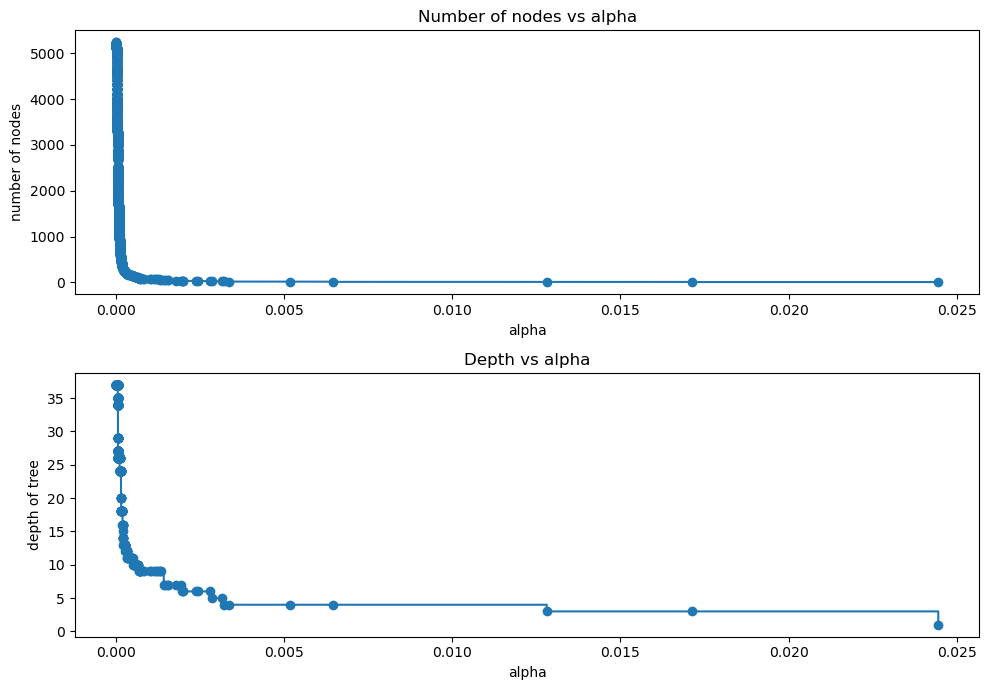

In [3986]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### f1 vs alpha for training and test sets

In [3988]:
dt_models = clfs 

f1_train = []
for dt_model in dt_models:
    pred_train = dt_model.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for dt_model in dt_models:
    pred_test = dt_model.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

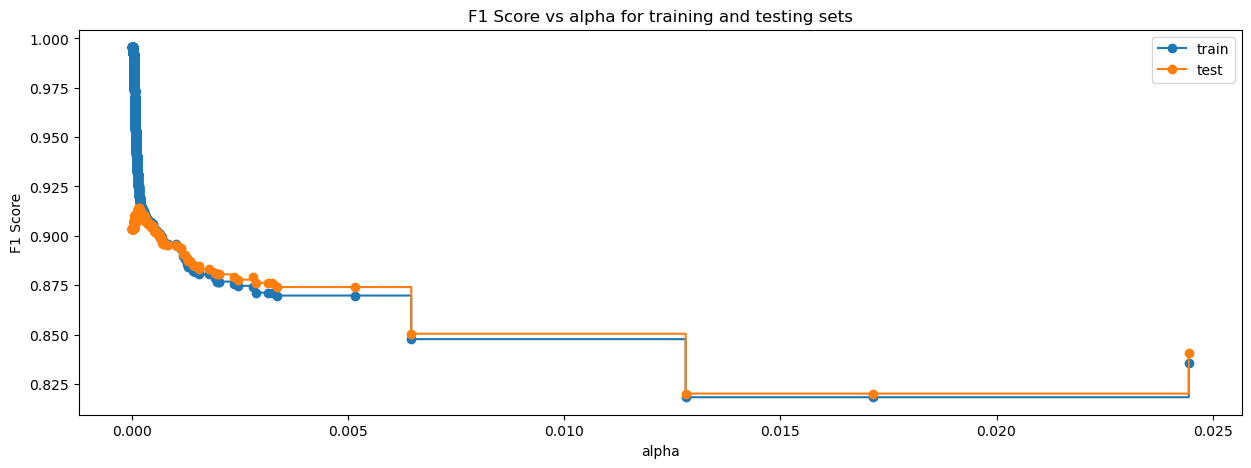

In [3989]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas,  f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [3990]:
# Creating the model where we get highest test f1_score
index_best_model = np.argmax(f1_train)

# Get the best_model from the highest test f1_score.
dt_model_post_pruned = dt_models[index_best_model]
print(dt_model_post_pruned)

DecisionTreeClassifier(ccp_alpha=1.53151083543916e-05, random_state=1)


## Confusion Matrix - post-pruned decision tree

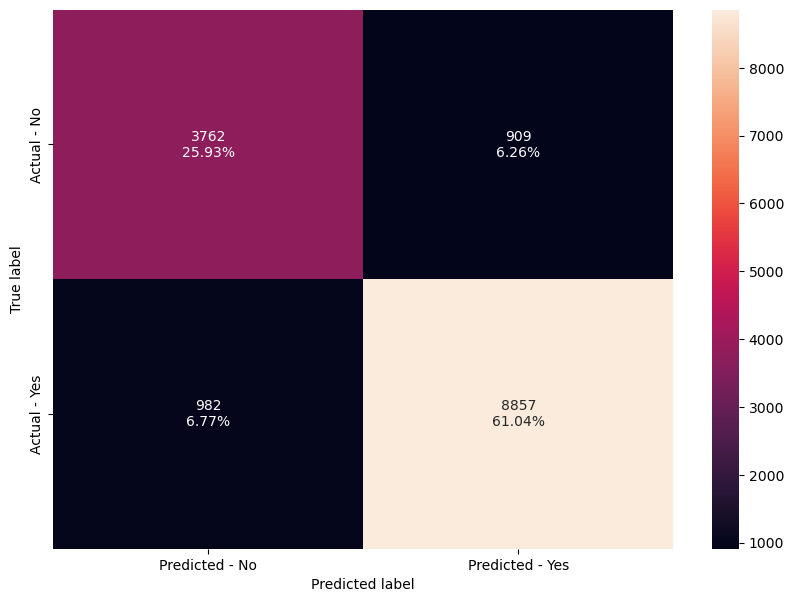

In [3992]:
make_confusion_matrix(dt_model_post_pruned, y_test)

In [3993]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    dt_model_post_pruned, X_train, y_train # Change model to dTree
)
decision_tree_post_perf_train



,Accuracy,Recall,Precision,F1
0,0.99403,0.99574,0.99533,0.99553


In [3994]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    dt_model_post_pruned, X_test, y_test # Change model to dTree
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.86968,0.90019,0.90692,0.90355


* With post-pruning we get the highest f1 score on both training and test set

In [3996]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model_post_pruned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                         Imp
lead_time                            0.35300
avg_price_per_room                   0.16862
market_segment_type_Online           0.08765
arrival_date                         0.08664
no_of_special_requests               0.06836
arrival_month                        0.06764
no_of_week_nights                    0.04791
no_of_weekend_nights                 0.03586
no_of_adults                         0.03062
arrival_year                         0.01364
type_of_meal_plan_Not Selected       0.00854
required_car_parking_space           0.00709
room_type_reserved_Room_Type 4       0.00665
no_of_children                       0.00548
market_segment_type_Offline          0.00374
type_of_meal_plan_Meal Plan 2        0.00323
room_type_reserved_Room_Type 2       0.00173
room_type_reserved_Room_Type 5       0.00136
market_segment_type_Corporate        0.00052
repeated_guest                       0.00051
room_type_reserved_Room_Type 6       0.00046
no_of_prev

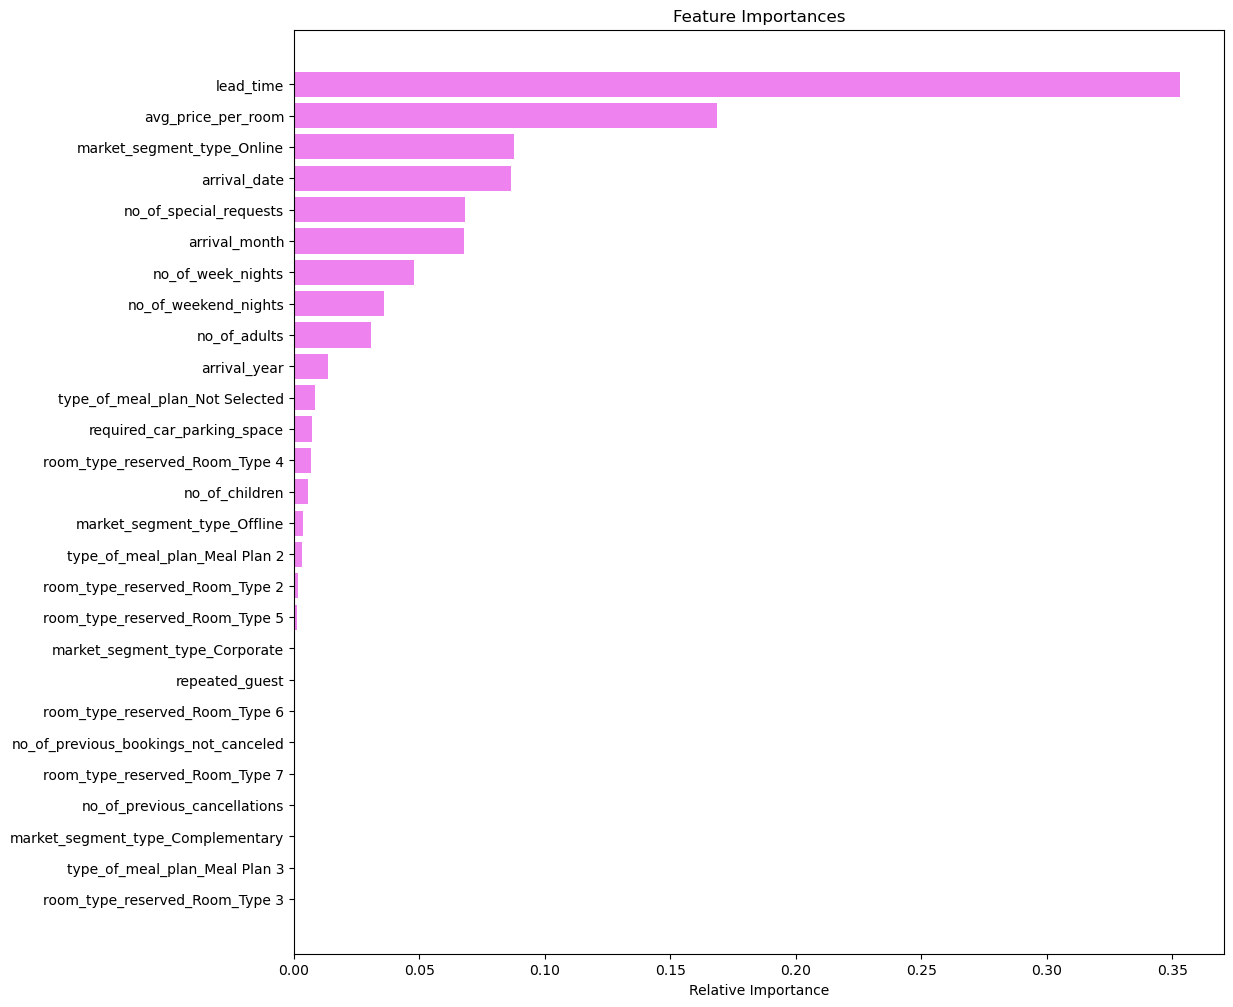

In [3997]:
importances = dt_model_post_pruned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Lead time is the most important feature,followed by average price room and market segment online

## Comparing all the decision tree models

In [4000]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_perf_train1.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99403,0.78456,0.99403
Recall,0.99526,0.81177,0.99574
Precision,0.99581,0.85831,0.99533
F1,0.99553,0.83439,0.99553


In [4001]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_perf_test1.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df 

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86940,0.78939,0.86968
Recall,0.89968,0.81299,0.90019
Precision,0.90697,0.86804,0.90692
F1,0.90331,0.83961,0.90355
